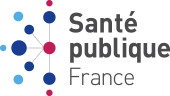

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

# Contexte
L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


# Partie 1 - Objectif 
* Trouver une idée d’application : sélection des variables pertinentes
* Traitement des données ( imputation, gestion des valeurs aberrantes / manquantes)
* Automatisant des traitements.
* Tests hypothèses et analyses exploratoires
* Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
* Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.


Chargez le fichier `fr.openfoodfacts.org.products.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t') 

# Les  données Open Food Facts
Open Food Facts est un projet collaboratif dont le but est de constituer une base de données libre et ouverte sur les produits alimentaires commercialisés dans le monde entier
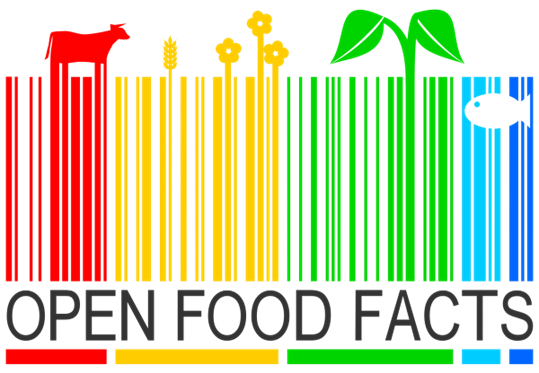
## Compréhension des données
Chargement du fichiers csv avec la fonction read_csv de Pandas
<br> Utilisation des fonctions **head(),shape et describe()**

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

la taille du dataframe avec shape

In [4]:
df.shape

(320772, 162)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [5]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [6]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [7]:
for col in df.columns:
    print(col,df[col].nunique())

code 320638
url 320749
creator 3535
created_t 189636
created_datetime 189568
last_modified_t 180639
last_modified_datetime 180495
product_name 221347
generic_name 38584
quantity 13826
packaging 14547
packaging_tags 12064
brands 58784
brands_tags 50253
categories 36982
categories_tags 21142
categories_fr 21152
origins 4840
origins_tags 4372
manufacturing_places 7308
manufacturing_places_tags 6736
labels 18114
labels_tags 13653
labels_fr 13655
emb_codes 8462
emb_codes_tags 8158
first_packaging_code_geo 1602
cities 3
cities_tags 2572
purchase_places 5120
stores 3259
countries 1434
countries_tags 725
countries_fr 722
ingredients_text 205520
allergens 12939
allergens_fr 19
traces 8378
traces_tags 3578
traces_fr 3584
serving_size 25423
no_nutriments 0
additives_n 31
additives 196069
additives_tags 41537
additives_fr 41537
ingredients_from_palm_oil_n 3
ingredients_from_palm_oil 0
ingredients_from_palm_oil_tags 14
ingredients_that_may_be_from_palm_oil_n 7
ingredients_that_may_be_from_palm_oil 

# Trouver une idée d’application : sélection des variables pertinentes

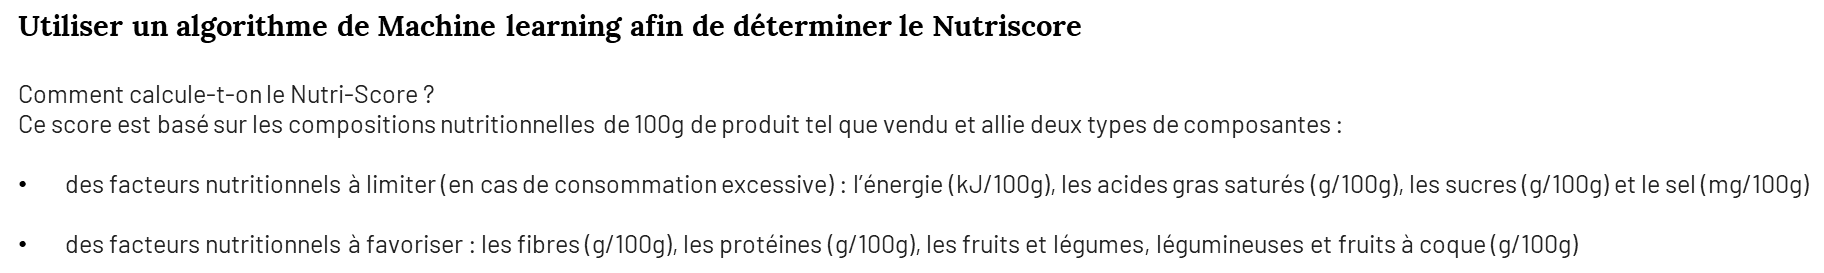
## Data Cleaning
On commence par filtrer nos données pour obtenir un dataset avec unquement les features interessantes pour notre application

In [8]:
df = df[['created_datetime',
         'countries',
         'creator',
         'product_name',
         'origins',
         'fat_100g',
         'sugars_100g',
         'energy_100g',
         'carbohydrates_100g',
         'saturated-fat_100g',
         'fiber_100g',
         'proteins_100g',
         'salt_100g',
         'fruits-vegetables-nuts_100g',
         'nutrition-score-fr_100g',
         'pnns_groups_1',
         'nutrition_grade_fr']]

In [9]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   created_datetime             320763 non-null  object 
 1   countries                    320492 non-null  object 
 2   creator                      320770 non-null  object 
 3   product_name                 303010 non-null  object 
 4   origins                      22190 non-null   object 
 5   fat_100g                     243891 non-null  float64
 6   sugars_100g                  244971 non-null  float64
 7   energy_100g                  261113 non-null  float64
 8   carbohydrates_100g           243588 non-null  float64
 9   saturated-fat_100g           229554 non-null  float64
 10  fiber_100g                   200886 non-null  float64
 11  proteins_100g                259922 non-null  float64
 12  salt_100g                    255510 non-null  float64
 13 

## % Missing Values

,Total,Percent
fruits-vegetables-nuts_100g,317736,0.990535
origins,298582,0.930823
pnns_groups_1,229259,0.714710
fiber_100g,119886,0.373742
nutrition_grade_fr,99562,0.310382
nutrition-score-fr_100g,99562,0.310382
saturated-fat_100g,91218,0.284370
carbohydrates_100g,77184,0.240620
fat_100g,76881,0.239675
sugars_100g,75801,0.236308


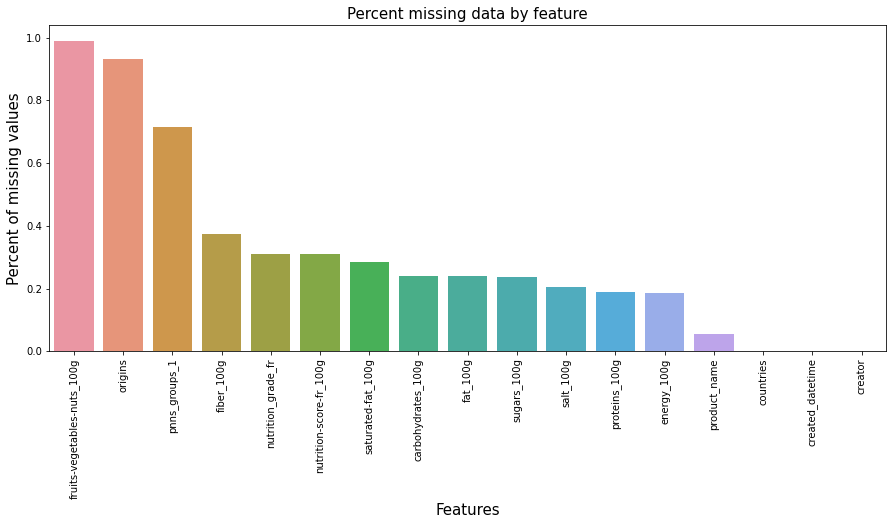

In [10]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

<AxesSubplot:>

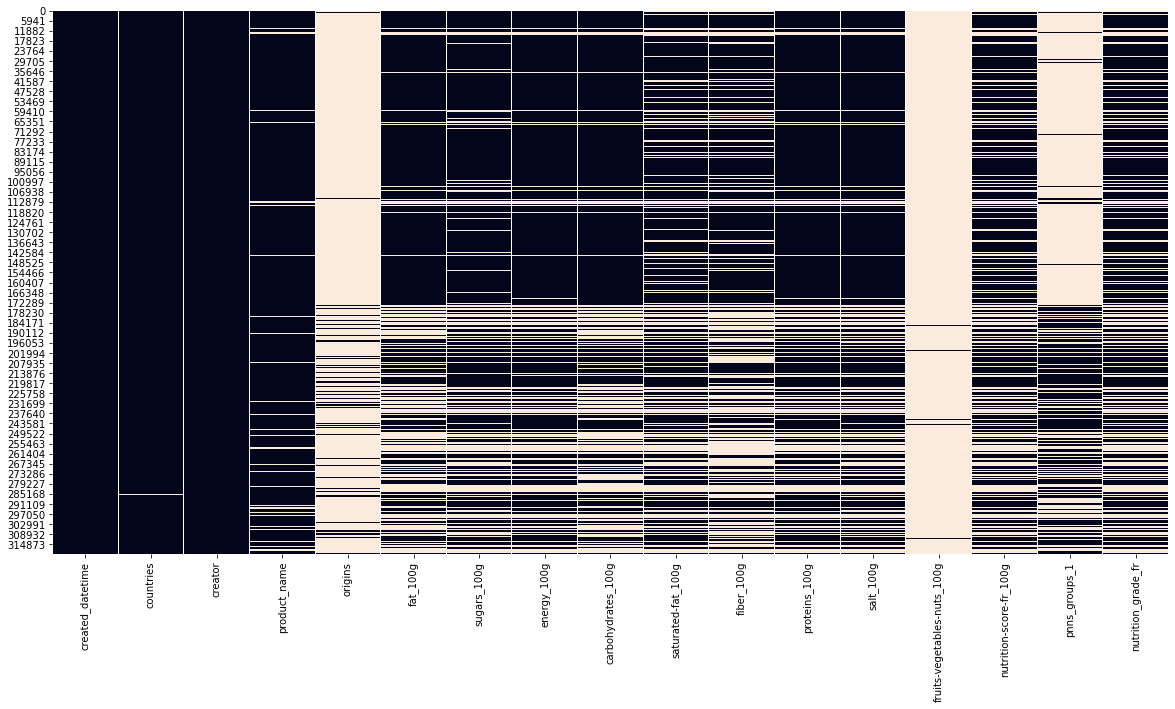

In [11]:
#sisualisation des Nan avec seaborn et le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

Nayant pas suffisament de données, nous décidons de retirer les features origins et fruits et vegetables, Malheureusement car l'information fruits et vegetables était interessante à exploiter pour le calcul du nutriscore.

In [12]:
#création de missing rate
missing_rate = df.isna().sum()/df.shape[0]

In [13]:
missing_rate

created_datetime               0.000028
countries                      0.000873
creator                        0.000006
product_name                   0.055373
origins                        0.930823
fat_100g                       0.239675
sugars_100g                    0.236308
energy_100g                    0.185986
carbohydrates_100g             0.240620
saturated-fat_100g             0.284370
fiber_100g                     0.373742
proteins_100g                  0.189699
salt_100g                      0.203453
fruits-vegetables-nuts_100g    0.990535
nutrition-score-fr_100g        0.310382
pnns_groups_1                  0.714710
nutrition_grade_fr             0.310382
dtype: float64

On fixe un seuil de 90% de valeurs manquantes, nous supprimerons les features avec un taux de missing value au delà

In [14]:
df.drop(df.columns[missing_rate>0.9], axis=1, inplace=True)

## Countries Column Filtering
Nous utiliserons regex pour conserver uniquement les lignes avec le nom France et FR

In [15]:
import re

In [16]:
df['countries'] = df['countries'].astype(str)

In [17]:
df['countries'].value_counts().index.tolist()

['US',
 'France',
 'en:FR',
 'Suisse',
 'Deutschland',
 'España',
 'United Kingdom',
 'United States',
 'en:CH',
 'en:BE',
 'en:GB',
 'Australia',
 'en:DE',
 'Россия',
 'en:ES',
 'Belgique',
 'en:US',
 'en:AU',
 'en:IT',
 'en:CA',
 'France, Suisse',
 'Portugal',
 'Germany',
 'Switzerland',
 'Italia',
 'Canada',
 'nan',
 'Nederland',
 'Belgium',
 'Spain',
 'Belgique,France',
 'en:CZ',
 'France,Suisse',
 'en:FR, Suisse',
 'en:AT',
 'en:TH',
 'en:NL',
 'Österreich',
 'Brasil',
 'Magyarország',
 'Denmark',
 'en:BR',
 'Germany,Switzerland',
 'Italie',
 'en:RU',
 'en:MA',
 'France,UK',
 'Italy',
 'en:LU',
 'Schweiz',
 'Ireland',
 'UK,France',
 'France,United Kingdom',
 'en:PT',
 'en:TW',
 'France, en:switzerland',
 'en:CN',
 'en:DZ',
 'en:JP',
 'Netherlands',
 'en:RO',
 'en:HK',
 'en:RE',
 'Frankreich,Deutschland',
 'France,Switzerland',
 'France, US',
 'France, en:belgium',
 'România',
 'en:NC',
 'Serbia',
 'Chile',
 'France,Allemagne',
 'New Zealand',
 'Guadeloupe',
 'France,Royaume-Uni',


In [18]:
France = re.compile('France')
FR = re.compile('en:FR')

In [19]:
df['France'] = df['countries'].str.extract('(France)', expand=True)
df['FR'] = df['countries'].str.extract('(FR)', expand=True)

In [20]:
df = df[(df['France'] == 'France') | (df['FR'] == 'FR')]

In [21]:
df.drop(['FR','France'], axis=1,inplace=True)

## Date Column Filtering
On s'interesse maintenant à la feature Created datetime pour avoir une idée de l'étendue temporelle de nos données

In [22]:
df['created_datetime'] = df['created_datetime'].astype(str)

# Isoler les années avec la fonction split
df["Year"] = df['created_datetime'].apply(
    lambda x: x.split('-')[0])

In [23]:
# verification des date unique
df["Year"].nunique()

7

In [24]:
# nombre de dates
df["Year"].value_counts()

2016    30760
2017    23529
2015    22759
2014     9027
2013     8309
2012     3163
nan         1
Name: Year, dtype: int64

On remarque une 'année' correspondant à Nan. Nous eliminons cette ligne de notre dataframe

In [25]:
df[df["Year"]=='nan']

,created_datetime,countries,creator,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr,Year
187478,nan,"France,Suisse",marianne,Lulu la barquette (Fraise),2.1,60.0,1480.0,78.0,0.5,1.2,4.2,0.08,13.0,Sugary snacks,d,nan


In [26]:
df.drop([187478], axis=0, inplace=True)

In [27]:
## Visualisation du nombre de donnée par Created datetime

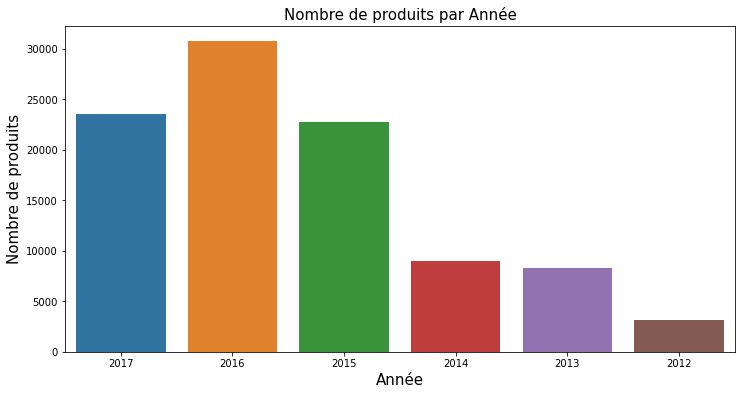

In [28]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x=df["Year"].sort_values(ascending=False))
plt.xlabel('Année', fontsize=15)
plt.ylabel('Nombre de produits', fontsize=15)
plt.title('Nombre de produits par Année', fontsize=15)
plt.show()

Pour notre analyse, notre plus grand contributeur sera openfoodfacts

In [29]:
df['creator'].value_counts()

openfoodfacts-contributors    28863
kiliweb                       13878
date-limite-app                7800
tacite                         7068
sebleouf                       5537
                              ...  
martinette56                      1
driacks                           1
isabellepailleau                  1
pipin75                           1
lapinlu                           1
Name: creator, Length: 2583, dtype: int64

,Total,Percent
fiber_100g,52185,0.534973
carbohydrates_100g,50903,0.521831
fat_100g,50476,0.517453
nutrition-score-fr_100g,36648,0.375696
nutrition_grade_fr,36648,0.375696
saturated-fat_100g,35698,0.365957
sugars_100g,35562,0.364563
salt_100g,35499,0.363917
proteins_100g,33796,0.346459
energy_100g,33529,0.343721


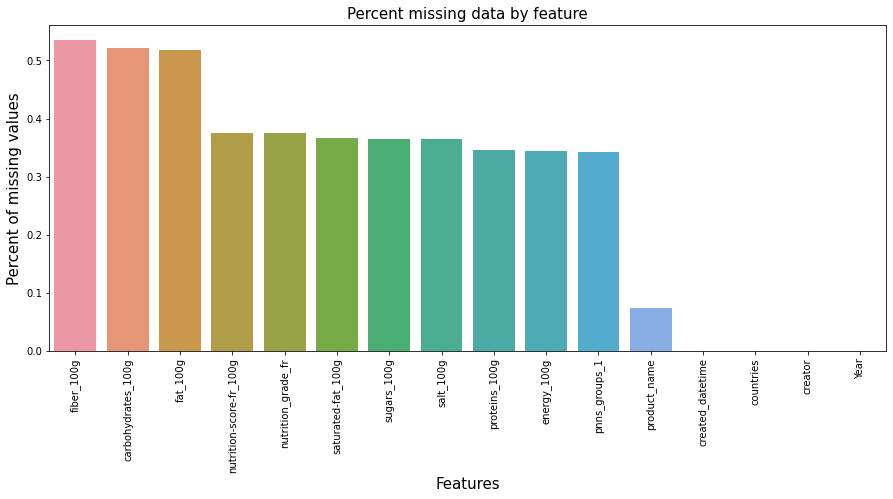

In [30]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

## Feature Pnns group1

In [31]:
df['pnns_groups_1'].nunique()

13

In [32]:
df['pnns_groups_1'].value_counts()

unknown                    12262
Sugary snacks               9259
Fish Meat Eggs              6752
Beverages                   6524
Milk and dairy products     6341
Composite foods             6033
Cereals and potatoes        6025
Fruits and vegetables       4044
Fat and sauces              3773
Salty snacks                2100
fruits-and-vegetables        546
sugary-snacks                470
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

In [33]:
# supression de Unknown
df.drop(index=df[df['pnns_groups_1'] == 'unknown'].index, inplace=True)

In [34]:
list(pd.unique(df.pnns_groups_1.values))

[nan,
 'Cereals and potatoes',
 'Sugary snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Fat and sauces',
 'fruits-and-vegetables',
 'sugary-snacks',
 'cereals-and-potatoes']

In [35]:
df = df.replace("sugary-snacks", "Sugary snacks")
df = df.replace("cereals-and-potatoes", "Cereals and potatoes")
df = df.replace("fruits-and-vegetables", "Fruits and vegetables")

In [36]:
list(pd.unique(df.pnns_groups_1.values))

[nan,
 'Cereals and potatoes',
 'Sugary snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Fat and sauces']

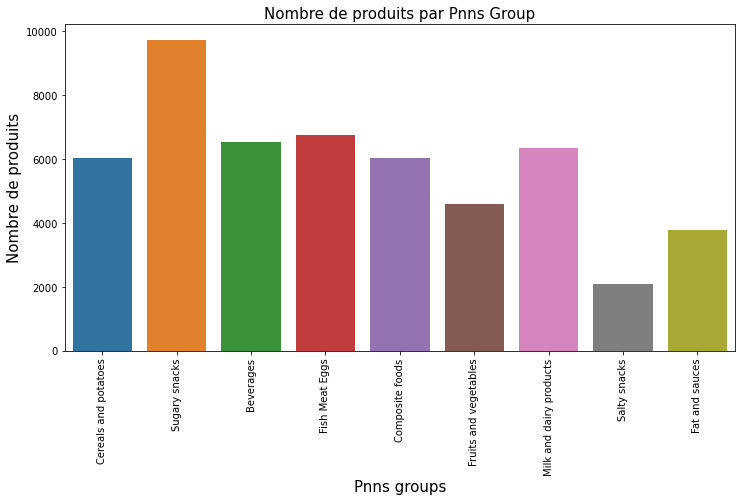

In [37]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x=df["pnns_groups_1"])
plt.xlabel('Pnns groups', fontsize=15)
plt.ylabel('Nombre de produits', fontsize=15)
plt.title('Nombre de produits par Pnns Group', fontsize=15)
plt.xticks(rotation='90')
plt.show()

## Supression des features

<br>
Les features ayant servi au travail de filtrage précedement également seront supprimées pendant cette étape

In [38]:
df.drop(['created_datetime',"creator",'countries','Year'], axis=1,inplace=True)

In [39]:
df.shape

(85285, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85285 entries, 0 to 320770
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             79171 non-null  object 
 1   fat_100g                 40341 non-null  float64
 2   sugars_100g              54594 non-null  float64
 3   energy_100g              56311 non-null  float64
 4   carbohydrates_100g       39937 non-null  float64
 5   saturated-fat_100g       54498 non-null  float64
 6   fiber_100g               40128 non-null  float64
 7   proteins_100g            56088 non-null  float64
 8   salt_100g                54643 non-null  float64
 9   nutrition-score-fr_100g  53791 non-null  float64
 10  pnns_groups_1            51869 non-null  object 
 11  nutrition_grade_fr       53791 non-null  object 
dtypes: float64(9), object(3)
memory usage: 10.5+ MB


## Duplicated Values
Nous nous interessons maintenant aux lignes dupliquées

In [41]:
# combien de valeurs manquantes dans les duplicated
df[df.duplicated()].isna().sum()

product_name               5985
fat_100g                   8402
sugars_100g                8376
energy_100g                8363
carbohydrates_100g         8411
saturated-fat_100g         8376
fiber_100g                 8751
proteins_100g              8364
salt_100g                  8369
nutrition-score-fr_100g    8376
pnns_groups_1              7061
nutrition_grade_fr         8376
dtype: int64

In [42]:
df_duplicated = df.drop_duplicates()

print(
    f"Il y a un total de {len(df) - len(df_duplicated)} lignes dupliquées.")

Il y a un total de 9180 lignes dupliquées.


In [43]:
df = df_duplicated

# Traitement des données ( imputation, gestion des valeurs aberrantes / manquantes)

Traiter les données manquantes revient à “réparer” le jeu de données pour qu’il puisse être utilisable par les algorithmes de Machine Learning. La réparation d’un jeu de données peut prendre plusieurs formes : Comme supprimer les donner manquantes ou les remplacer les valeurs manquantes (on parle d’imputation).

## Product name
Nous devons vérifier les produits présents plusieurs fois dans notre dataset (*produits dupliqués*). IL s'agit de les quantifier et ensuite d'appliquer un group by avec une stratégie de regroupement par la mediane

In [44]:
# produits dupliqués
df['product_name'].value_counts()

Mayonnaise                                                                                               40
Orange                                                                                                   39
Huile d'olive vierge extra                                                                               38
Moutarde de Dijon                                                                                        33
Jus d'orange                                                                                             33
                                                                                                         ..
Smoothie fraises et bananes                                                                               1
Le Charolais                                                                                              1
Barres chocolat farines de riz et de teff                                                                 1
Nouilles instantanées, Arôme

In [45]:
len(df['product_name'].unique())

64990

Nous pouvons observer que nous avons 64990 produits uniques

In [46]:
# group by et appliquer d'une stratégie regroupement mediane
df = df.groupby("product_name")[["fat_100g", "sugars_100g", "energy_100g", "carbohydrates_100g",
                                 "saturated-fat_100g", "fiber_100g", "proteins_100g",
                                 "salt_100g",'nutrition-score-fr_100g']].agg(lambda x: x.median())

df.reset_index(inplace=True)

In [47]:
df.shape

(64989, 10)

Pour la feature product name, nous allons devoir gérer des valeurs manquantes. Il ne sera pas possible de conserver dans notre dataset des row ou la feature product name est manquante. Nous éliminerons les données na

In [48]:
df_categorial_feature = df_duplicated[[
    'product_name', 'pnns_groups_1', 'nutrition_grade_fr']]

In [49]:
df_categorial_feature.drop_duplicates(subset=['product_name'],inplace=True)

In [50]:
df_categorial_feature.shape

(64990, 3)

In [51]:
df_merge_product=pd.merge(df,df_categorial_feature, on='product_name')

In [52]:
df_merge_product.shape

(64989, 12)

<AxesSubplot:>

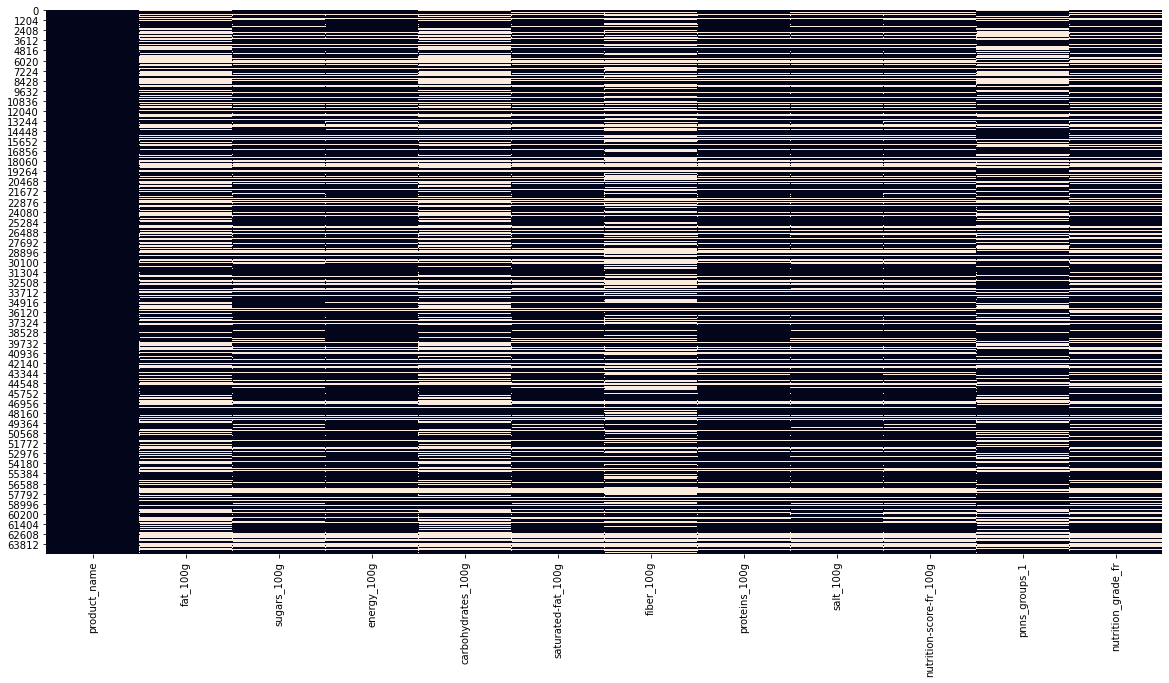

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df_merge_product.isna(), cbar=False)

## Nutritionnal values : Valeurs aberrantes 
Comme vu précedemment, **Open Food Facts** est un projet collaboratif, chaque utilisateur peut librement renseigner les valeurs nutritionnelles en Gramme et de 0 à 100g pour chaque produit sauf pour le cas de l'énergie diffère. Vérifions Avant/ Après cette opération sur les valeurs nutritionnelles

In [54]:
df_after = df_merge_product.copy()

In [55]:
# définition du nutritional value 100g
nutritional_value_100g = ['fat_100g', 'sugars_100g',
                          'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
                          'proteins_100g', 'salt_100g']

In [56]:
def range_0_100(df, cols):
    for col in cols:
        df.loc[df[col]>100,col] = np.nan
        df.loc[df[col]<0,col] = np.nan


In [57]:
range_0_100(df_after, nutritional_value_100g)

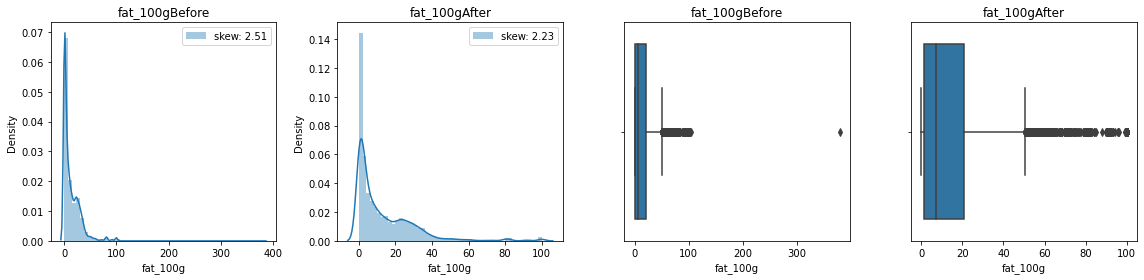

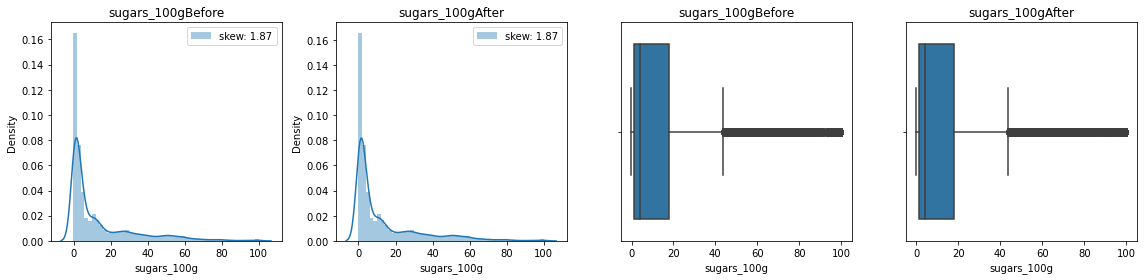

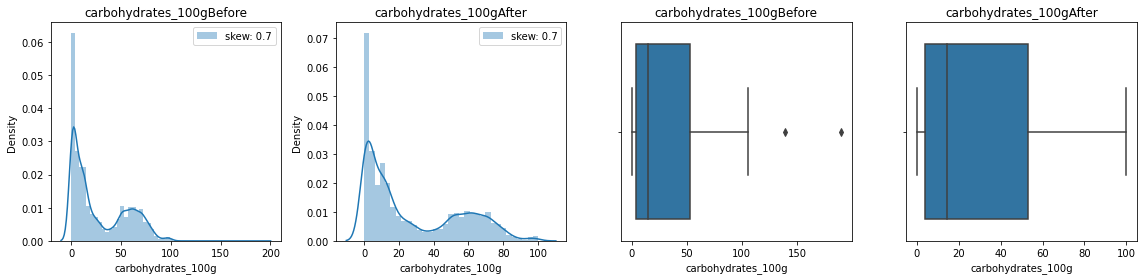

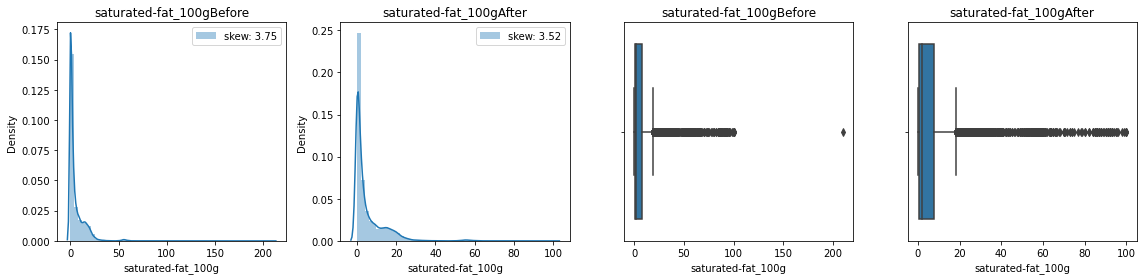

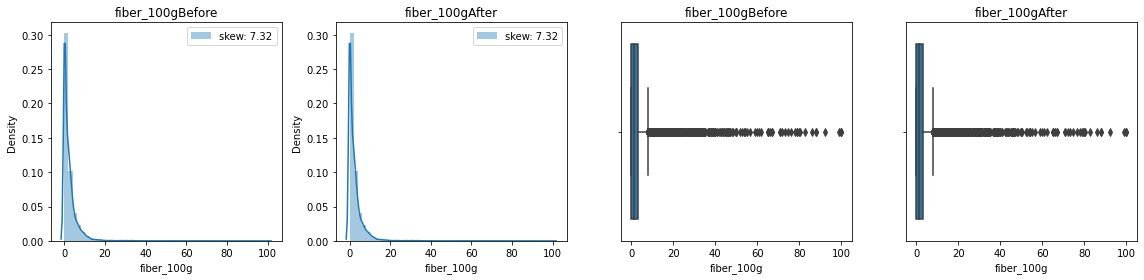

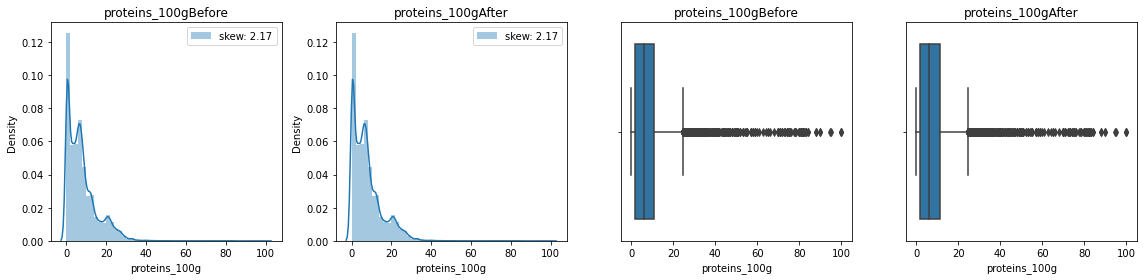

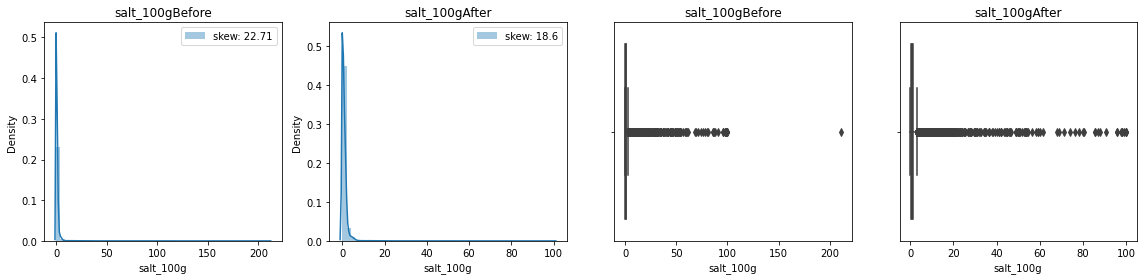

In [58]:
# réprésentation avec un displot avant/après et un boxplot avant/après
for col in nutritional_value_100g:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(141)
    sns.distplot(df_merge_product[col], label="skew: "+str(np.round(df_merge_product[col].skew(),2)))
    plt.title(col + "Before")
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_after[col], label="skew: "+str(np.round(df_after[col].skew(),2)))
    plt.title(col + "After")
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_merge_product[col])
    plt.title(col + "Before")
    
    plt.subplot(144)
    sns.boxplot(df_after[col])
    plt.title(col + "After")
    plt.tight_layout()
    plt.show()

### Fat_100g
vérification des valeurs abérantes pour la feature fat_100g. Nous pouvons contacter que 2 produits sont avec des valeurs qui dépasse 100g

In [59]:
#min()
df_merge_product['fat_100g'].min()

0.0

In [60]:
#max()
df_merge_product['fat_100g'].max()

380.0

In [61]:
# vérification des produits
df_merge_product[df_merge_product['fat_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
25242,Graine de couscous moyen,105.0,2.5,1482.0,70.0,0.3,NaN,12.0,0.01,-1.0,Cereals and potatoes,a
63760,mini choux goût fromage de chèvre - poivre,380.0,22.7,18700.0,190.0,210.0,0.0,0.0,9.33,35.0,Salty snacks,e


### saturated-fat_100g

vérification des valeurs abérantes pour la feature saturated-fat_100g. Nous pouvons constater qu'il y un seul produit au dessus des 100g

In [62]:
#min()
df_merge_product['saturated-fat_100g'].min()

0.0

In [63]:
#max()
df_merge_product['saturated-fat_100g'].max()

210.0

In [64]:
df_merge_product[df_merge_product['saturated-fat_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
63760,mini choux goût fromage de chèvre - poivre,380.0,22.7,18700.0,190.0,210.0,0.0,0.0,9.33,35.0,Salty snacks,e


### sugars_100g
Vérification des valeurs abérantes pour la feature sugar_100g. Nous pouvons observer aucune donnée abérantes sur cette feature

In [65]:
#min()
df_merge_product['sugars_100g'].min()

-0.1

In [66]:
#max()
df_merge_product['sugars_100g'].max()

100.0

In [67]:
df_merge_product[df_merge_product['sugars_100g']<0]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
9737,Caprice des dieux,30.0,-0.1,1379.0,0.8,21.0,NaN,15.3,1.4,15.0,Milk and dairy products,d


### carbohydrates_100g 
vérification des valeurs abérantes pour la feature sugar_100g. Nous pouvons constater qu'il y trois  produits au dessus des 100g

In [68]:
#min()
df_merge_product['carbohydrates_100g'].min()

0.0

In [69]:
#max()
df_merge_product['carbohydrates_100g'].max()

190.0

In [70]:
df_merge_product[df_merge_product['carbohydrates_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
4453,Banane sèche,0.0,41.5,1259.0,139.0,0.0,0.0,5.0,0.00000,4.0,Fruits and vegetables,c
41989,Palets pur beurre,52.0,52.0,3925.0,106.0,35.5,3.0,10.0,1.30048,31.0,NaN,NaN
63760,mini choux goût fromage de chèvre - poivre,380.0,22.7,18700.0,190.0,210.0,0.0,0.0,9.33000,35.0,Salty snacks,e


### fiber_100g 
Vérification des valeurs abérantes pour la feature fiber_100g. Nous pouvons observer aucune donnée abérantes sur cette feature

In [71]:
#min()
df_merge_product['fiber_100g'].min()

0.0

In [72]:
#max()
df_merge_product['fiber_100g'].max()

100.0

### proteins_100g  
Vérification des valeurs abérantes pour la feature proteins_100g. Nous pouvons observer aucune donnée abérantes sur cette feature

In [73]:
#min()
df_merge_product['proteins_100g'].min()

0.0

In [74]:
#max()
df_merge_product['proteins_100g'].max()

100.0

### salt_100g   
vérification des valeurs abérantes pour la feature sugar_100g. Nous pouvons constater qu'il y un seul produit au dessus des 100g

In [75]:
#min()
df_merge_product['salt_100g'].min()

0.0

In [76]:
#max()
df_merge_product['salt_100g'].max()

211.0

In [77]:
df_merge_product[df_merge_product['salt_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
29159,Keeny Bio,23.0,26.7,1720.0,47.8,3.33,0.741,6.3,211.0,22.0,Sugary snacks,e


## Energy_100g
Quelle unité de mesure Cal ou Joules? Vérifions

In [78]:
df_merge_product['energy_100g'].describe()

count    47048.00000
mean      1114.19673
std        789.42070
min          0.00000
25%        430.87500
50%       1029.00000
75%       1653.00000
max      18700.00000
Name: energy_100g, dtype: float64

In [79]:
df_merge_product[df_merge_product['product_name']=='Cookies']

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
14561,Cookies,24.05,33.0,2061.0,62.15,12.0,3.4,5.9,0.73,23.0,Sugary snacks,e


Selon USDA, Le cookie correspond à environ 502 calories soit environ 2100 Joules; Nous pouvons admettre qu'il semble que nos données soient en Joules

Parmi les aliments les plus caloriques, on retrouve les graisses d’origine animale
Ce type de graisse se caractérise par une forte teneur en gras saturé, source de cholestérol, tout en étant dépourvu de nutriments intéressants. L’huile de poisson et le lard par exemple apportent près de 900 calories par 100 grammes soit 3800 J pour 100g

In [80]:
#min()
df_merge_product['energy_100g'].min()

0.0

In [81]:
#max()
df_merge_product['energy_100g'].max()

18700.0

In [156]:
print(
    f"Il y a un total de {len(df_merge_product[df_merge_product['energy_100g']>3800])} produits ou l'énergie est supérieure à 3800Joules. Donc autant de produits avec des valeurs abérantes)


SyntaxError: EOL while scanning string literal (<ipython-input-156-b6a4bdafa932>, line 2)

In [83]:
df_merge_product[df_merge_product['energy_100g']>3800]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
834,1KG Nuggets Poulet Maitre Coq,NaN,1.30,4289.0,NaN,2.40,0.0,12.00,1.40000,18.0,NaN,d
893,2 Eclairs gourmands citron meringué,NaN,35.80,5272.0,NaN,7.20,1.0,5.00,0.39000,24.0,NaN,e
3860,Assortiment de roulades,NaN,0.90,4071.0,NaN,6.70,0.0,13.50,2.50000,26.0,NaN,e
4344,Baguettines viennoises briochées,NaN,1.00,5347.0,NaN,1.70,2.5,8.70,1.00000,12.0,NaN,d
4672,Barres de son d'avoine,NaN,3.00,5749.0,NaN,1.00,8.0,19.50,0.36000,6.0,NaN,c
5959,Biscuits Son D'avoine Nappés Chocolat 12 Biscuits,NaN,0.60,6063.0,NaN,3.60,10.1,13.80,0.19000,8.0,NaN,c
7639,Boulgour Bio Traditionnel,NaN,1.90,6134.0,NaN,0.30,7.3,11.50,0.02000,0.0,NaN,b
10865,Chevre Pane,NaN,2.00,5205.0,NaN,12.00,0.0,14.00,1.30000,25.0,NaN,e
10943,Chicken Cup Of Noodles,NaN,4.00,4602.0,NaN,4.70,0.0,9.70,0.00000,14.0,NaN,d
11658,Chocolat Liquide,NaN,46.40,4786.0,NaN,0.50,0.0,1.60,0.29000,21.0,NaN,e


Text(0.5, 0, 'energy_100g')

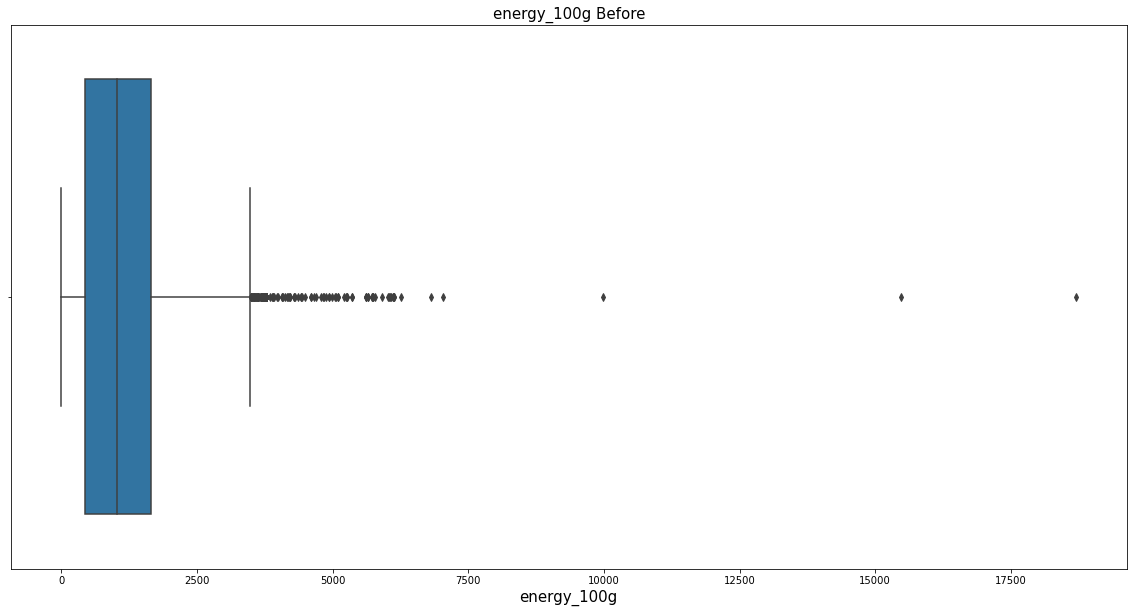

In [84]:
plt.figure(figsize=(20,10))
sns.boxplot(df_merge_product['energy_100g'])
plt.title("energy_100g Before", fontsize=15)
plt.xlabel('energy_100g', fontsize=15)

In [85]:
df_after.loc[df_after['energy_100g']>3800,'energy_100g'] = np.nan

Text(0.5, 0, 'energy_100g')

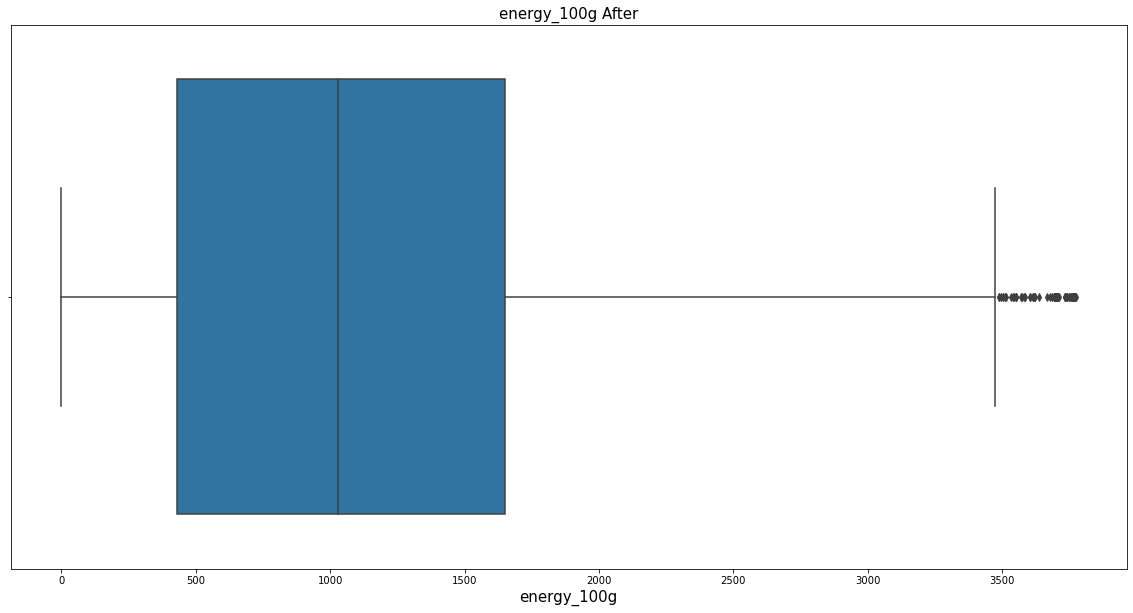

In [86]:
plt.figure(figsize=(20,10))
sns.boxplot(df_after['energy_100g'])
plt.title("energy_100g After", fontsize=15)
plt.xlabel('energy_100g', fontsize=15)

Nous venons de terminer cette étape de nettoyage en éliminant les valeurs abérréantes, celles hors du cadre de l'unité des différentes features nutritionnelle.

In [87]:
df_nutriscore = df_after.copy()

## Nutrition-score-fr_100g

* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

Le nutrition-score-fr_100g doit etre compris entre l'invervalle -15 et 40, les valeurs au delà sont considérées comme abérantes et necessiteront d'etre retirées de notre dataset

In [88]:
df_nutriscore['nutrition-score-fr_100g'] = df_nutriscore['nutrition-score-fr_100g'].round(
    0)

In [89]:
# vérification des produits ou le nutrition score >40
df_nutriscore[df_nutriscore['nutrition-score-fr_100g'] > 40]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr


In [90]:
# vérification des produits ou le nutrition score <-15
df_nutriscore[df_nutriscore['nutrition-score-fr_100g'] < -15]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr


Aucune abbération pour cette feature, Dans notre dataset nous disposons de la feature **nutrition grade**, interesssons nous à cette feature et faisons un parallèle avec la feature nutrition score. Les deux étant liées et voyons la cohérence entre elles

## Nutrition_grade_fr

Vérification que nos données sur cette feature **nutrition grade** vont de la lettre A à la lettre E

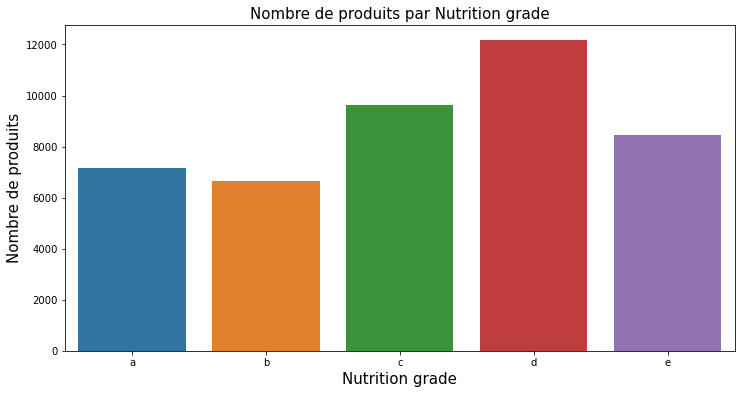

In [91]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x=df_nutriscore["nutrition_grade_fr"].sort_values(ascending=True))
plt.xlabel('Nutrition grade', fontsize=15)
plt.ylabel('Nombre de produits', fontsize=15)
plt.title('Nombre de produits par Nutrition grade', fontsize=15)
plt.show()

Vérifions que les **nutrition-score-fr_100g** et les **nutrition_grade_fr**	 sont correctement associés. Pour cela, nous croisons les variables dans un même tableau.
* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [92]:
#pd.cross tab
pd.crosstab(
    df_nutriscore['nutrition-score-fr_100g'], df_nutriscore['nutrition_grade_fr'])

nutrition_grade_fr,a,b,c,d,e
nutrition-score-fr_100g,,,,,
-14.0,3,0,0,0,0
-13.0,9,0,0,0,0
-12.0,15,0,0,0,0
-11.0,41,0,0,0,0
-10.0,60,0,0,0,0
-9.0,84,0,1,0,0
-8.0,144,1,0,0,0
-7.0,210,2,0,0,0
-6.0,900,4,0,0,0


On peut observer des erreurs pour certain produit, nous allons nous appuyer sur les valeurs du **nutrition-score-fr_100g** pour chaque produit et ainsi à l'aide d'une fonction nous pourrons implementer les valeurs corrects du nutrition grade

### Modification "nutrition_grade_fr"
Définition de la fonction qui retourne le bon nutrition grade en fonction de l'indice du nutrition score

In [93]:
def nutrition_grade(x):
    if x >=-15 and x <=-1 :
        return 'A' 
    elif x >=-0 and x <=2 :
        return 'B'
    elif x >=3 and x <=10:
        return 'C'
    elif x >=11 and x <=18 :
        return 'D'
    else:
         return 'E'

In [94]:
# apply
df_nutriscore["nutrition_grade_fr"] = df_nutriscore['nutrition-score-fr_100g'].apply(nutrition_grade)

In [95]:
# pd.crosstab
pd.crosstab(df_nutriscore['nutrition-score-fr_100g'], df_nutriscore['nutrition_grade_fr'])

nutrition_grade_fr,A,B,C,D,E
nutrition-score-fr_100g,,,,,
-14.0,3,0,0,0,0
-13.0,9,0,0,0,0
-12.0,16,0,0,0,0
-11.0,43,0,0,0,0
-10.0,64,0,0,0,0
-9.0,86,0,0,0,0
-8.0,149,0,0,0,0
-7.0,217,0,0,0,0
-6.0,929,0,0,0,0


<AxesSubplot:>

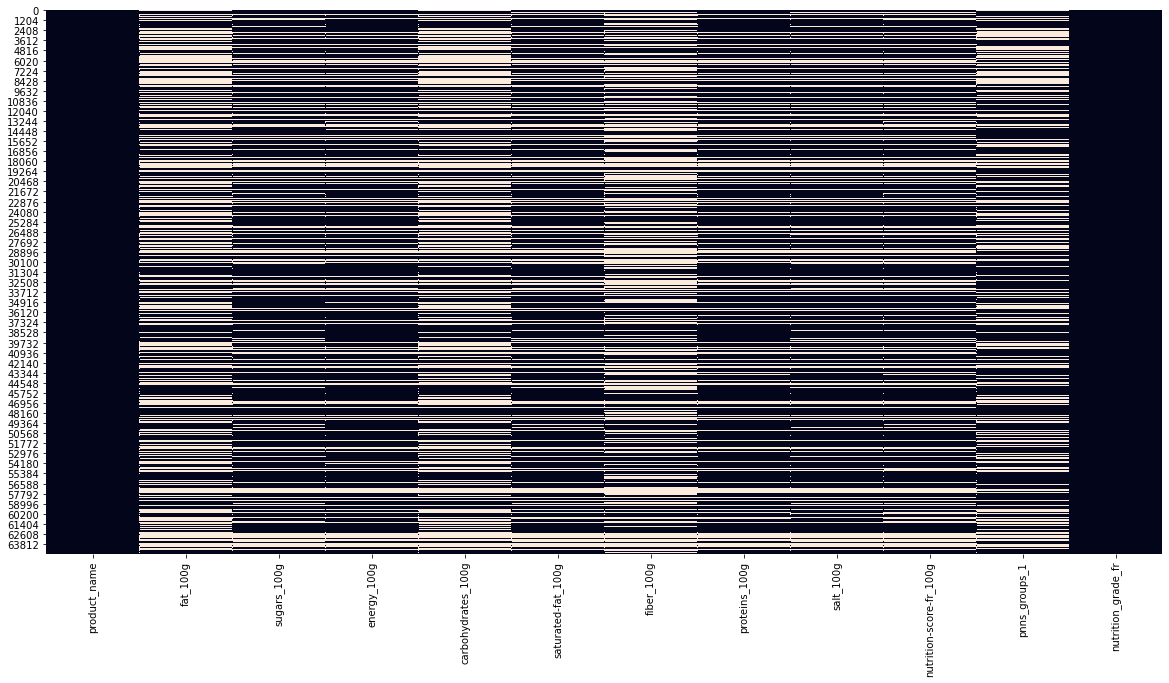

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(df_nutriscore.isna(), cbar=False)

# Valeurs atypiques :
Vérification de la présence de valeurs atypiques de part et d'autre, catégorisées comme des valeurs "extérieures" ou "éloignées" (*Tukey, 1977*).
* Une valeur extérieure est définie comme une valeur inférieure au quartile inférieur moins 1,5 fois l'écart interquartile, ou supérieure au quartile supérieur plus 1,5 fois l'écart interquartile (les "limites intérieures").
* Une valeur très éloignée est définie comme une valeur inférieure au quartile inférieur moins 3 fois l'écart interquartile, ou supérieure au quartile supérieur plus 3 fois l'écart interquartile (les "limites extérieures").
<br>
<br>
Appliquons la méthode interquartile (Tukey) sur nos données nutritionnelle en fonction du Pnns groupe. Avant nous devions passer par une étape de Normalisation de nos données numériques sur l'ensemble des 64989 rows


## Normalisation
Etape de normalisation de nos données numerical 100 g  pour redimensionner les variables afin qu’elles soient comparables sur une échelle commune. 
Le procédé de normalisation n’a besoin que du min et du max.

L’idée est la suivante, on ramène toutes les valeurs de la variable entre 0 et 1, tout en conservant les distances entre les valeurs.
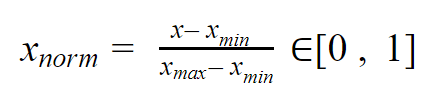

In [97]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [98]:
#df copy()
df_test_tukey = df_nutriscore.copy()

In [99]:
numerical_value_100g = ['fat_100g', 'sugars_100g','energy_100g',
                        'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
                        'proteins_100g', 'salt_100g','nutrition-score-fr_100g']

In [100]:
X = df_test_tukey.select_dtypes(include=np.number)

In [101]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [102]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [103]:
df_pnns = df_test_tukey['pnns_groups_1']

In [104]:
df_scaled = pd.concat([df_pnns, df_scaled], axis=1)

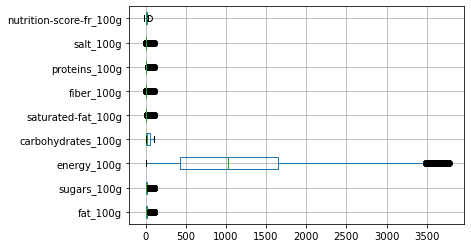

In [105]:
# avant normalisation
df_nutriscore.boxplot(vert=False)
plt.show()

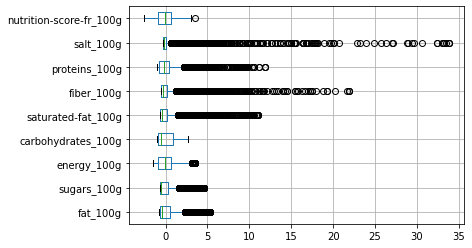

In [106]:
# après normalisation
df_scaled.boxplot(vert=False)
plt.show()

## Methode de Tukey
sur les features numériques

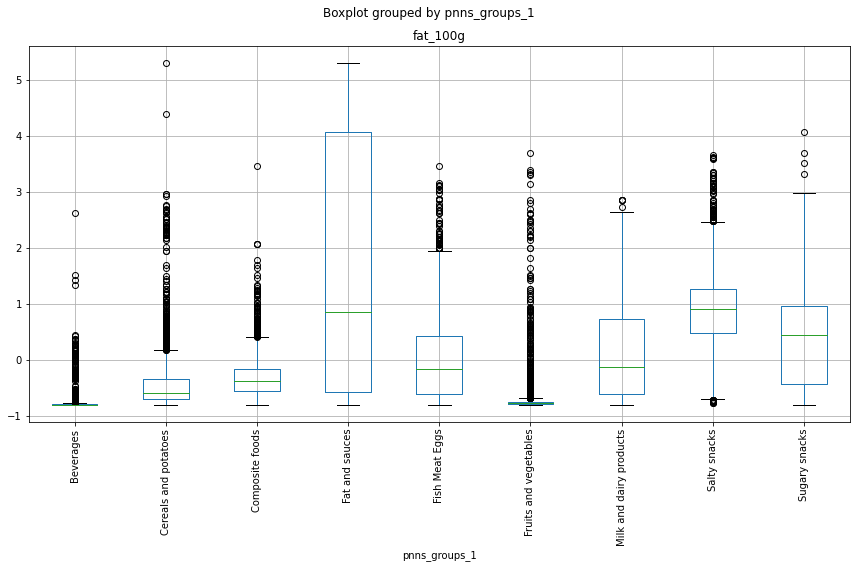

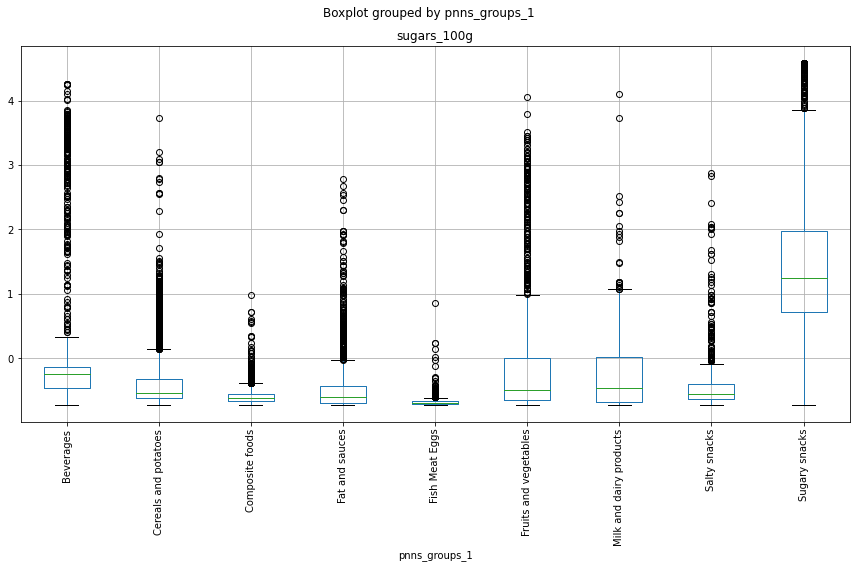

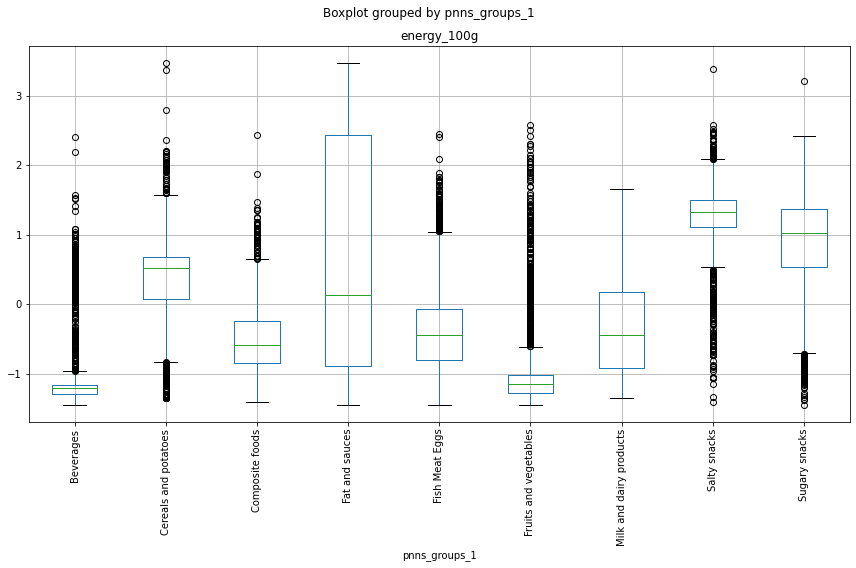

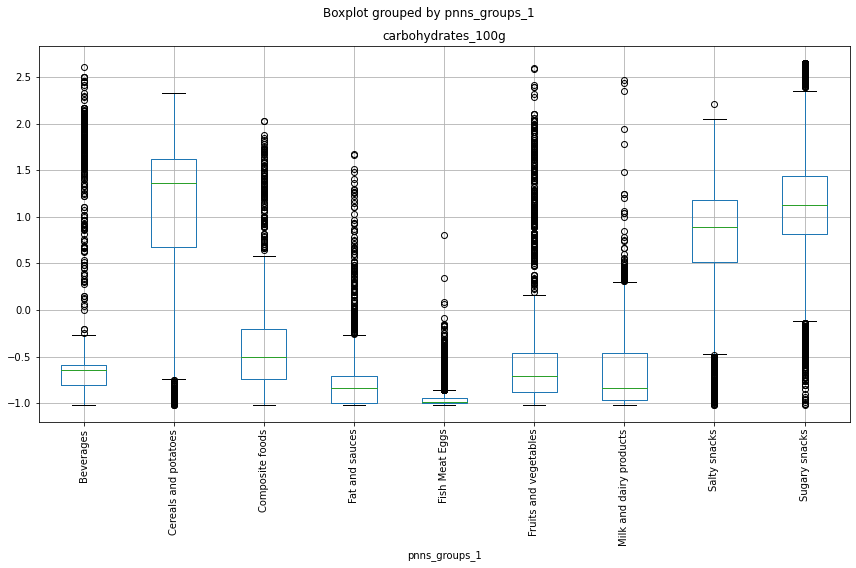

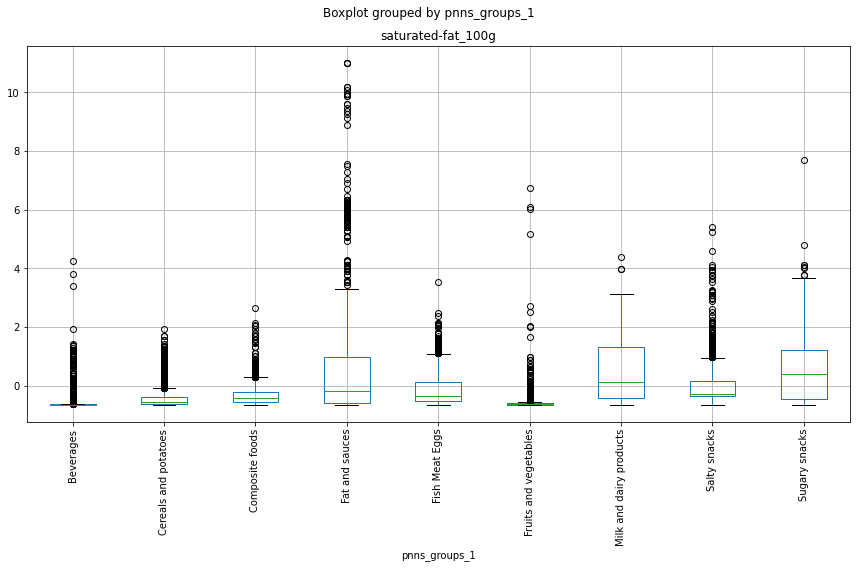

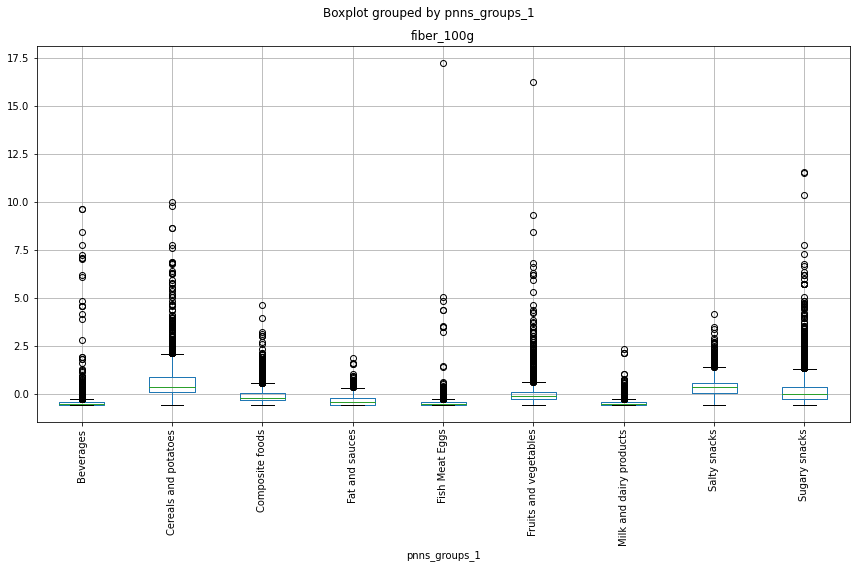

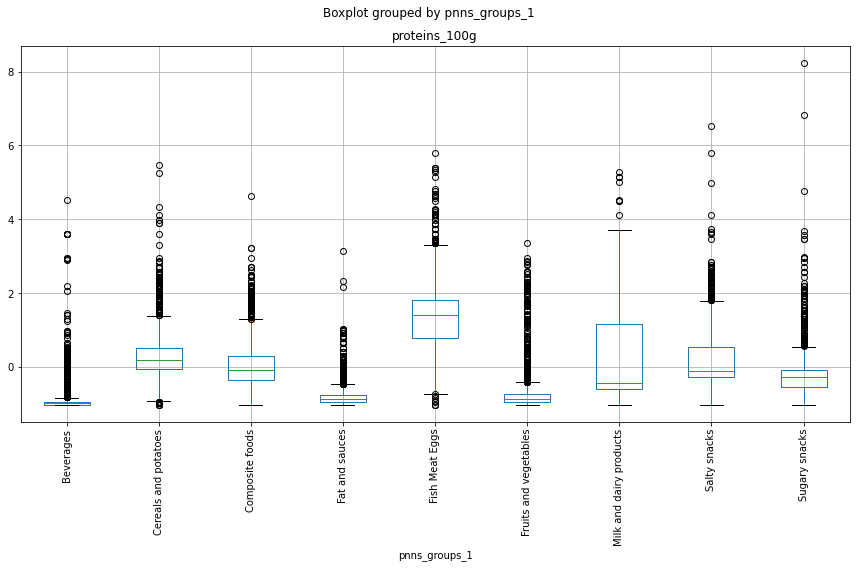

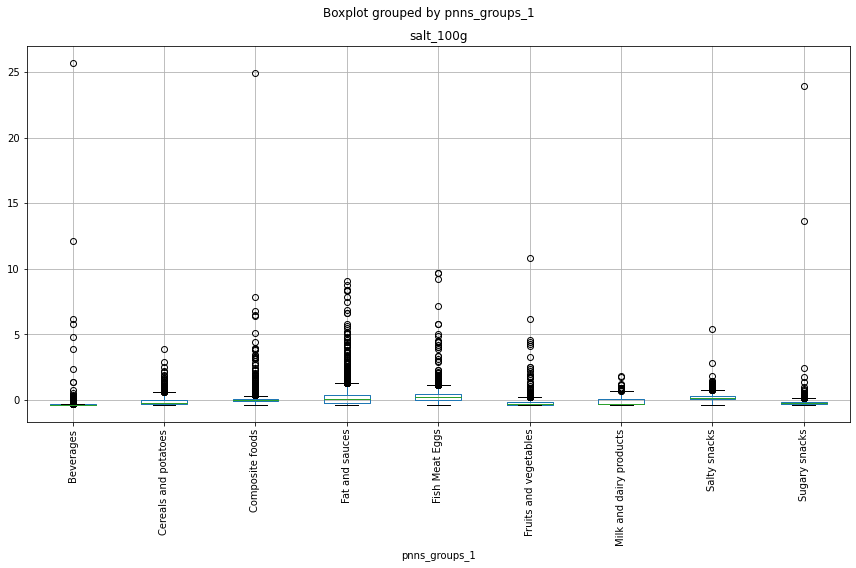

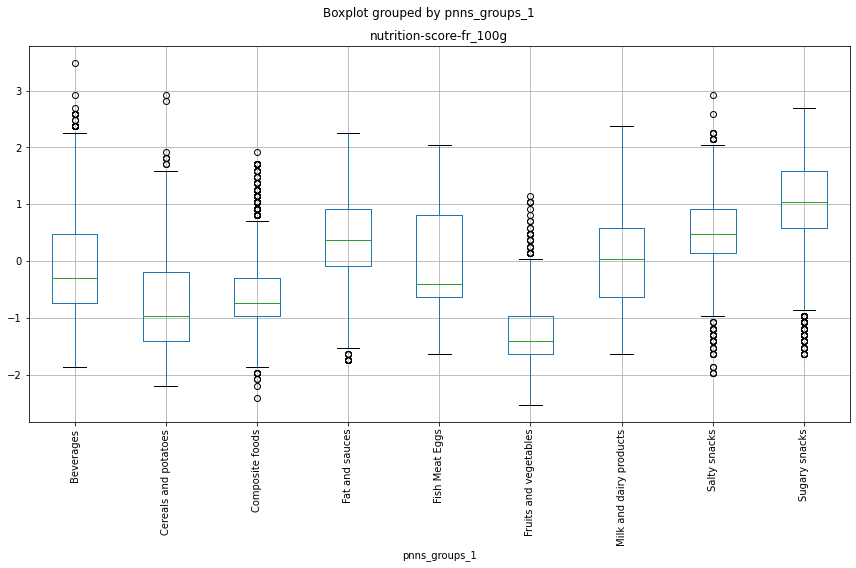

In [107]:
#Create a boxplot
for col in numerical_value_100g:
    df_scaled.boxplot(col, by='pnns_groups_1', figsize=(12, 8))
    plt.xticks(rotation='90')
    plt.tight_layout()
    plt.show()


In [108]:
pnns_group_1 = df_scaled["pnns_groups_1"].dropna().unique()

poour le groupe Milk and dairy products et la feature fat_100g
il y a 5 outliers


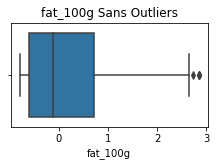

poour le groupe Milk and dairy products et la feature sugars_100g
il y a 22 outliers


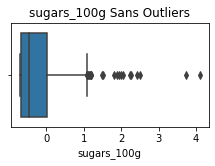

poour le groupe Milk and dairy products et la feature energy_100g
il y a 0 outliers


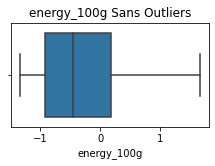

poour le groupe Milk and dairy products et la feature carbohydrates_100g
il y a 82 outliers


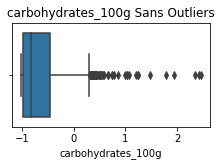

poour le groupe Milk and dairy products et la feature saturated-fat_100g
il y a 3 outliers


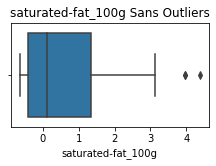

poour le groupe Milk and dairy products et la feature fiber_100g
il y a 237 outliers


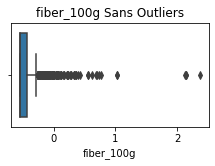

poour le groupe Milk and dairy products et la feature proteins_100g
il y a 8 outliers


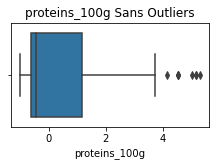

poour le groupe Milk and dairy products et la feature salt_100g
il y a 46 outliers


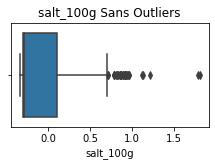

poour le groupe Milk and dairy products et la feature nutrition-score-fr_100g
il y a 0 outliers


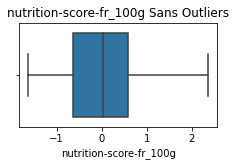

poour le groupe Beverages et la feature fat_100g
il y a 401 outliers


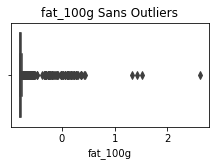

poour le groupe Beverages et la feature sugars_100g
il y a 256 outliers


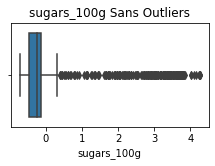

poour le groupe Beverages et la feature energy_100g
il y a 352 outliers


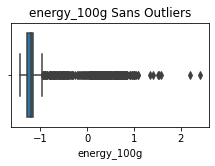

poour le groupe Beverages et la feature carbohydrates_100g
il y a 275 outliers


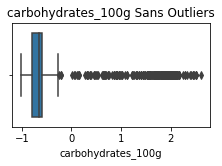

poour le groupe Beverages et la feature saturated-fat_100g
il y a 426 outliers


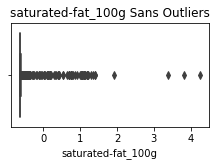

poour le groupe Beverages et la feature fiber_100g
il y a 150 outliers


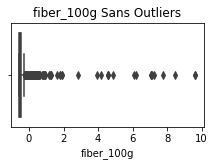

poour le groupe Beverages et la feature proteins_100g
il y a 304 outliers


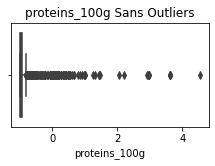

poour le groupe Beverages et la feature salt_100g
il y a 637 outliers


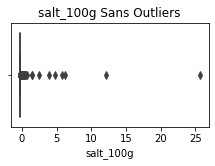

poour le groupe Beverages et la feature nutrition-score-fr_100g
il y a 23 outliers


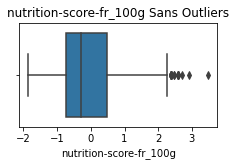

poour le groupe Sugary snacks et la feature fat_100g
il y a 4 outliers


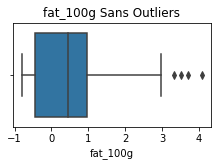

poour le groupe Sugary snacks et la feature sugars_100g
il y a 157 outliers


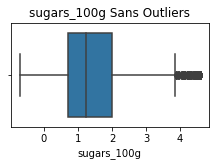

poour le groupe Sugary snacks et la feature energy_100g
il y a 135 outliers


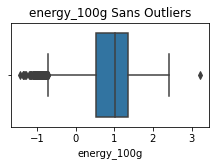

poour le groupe Sugary snacks et la feature carbohydrates_100g
il y a 457 outliers


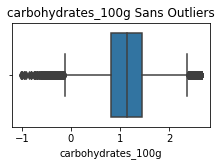

poour le groupe Sugary snacks et la feature saturated-fat_100g
il y a 8 outliers


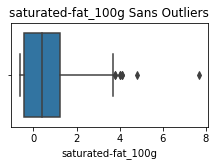

poour le groupe Sugary snacks et la feature fiber_100g
il y a 397 outliers


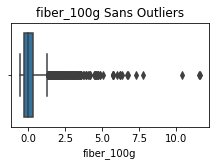

poour le groupe Sugary snacks et la feature proteins_100g
il y a 109 outliers


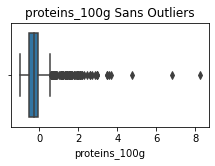

poour le groupe Sugary snacks et la feature salt_100g
il y a 70 outliers


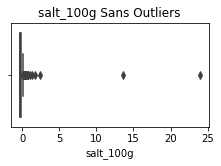

poour le groupe Sugary snacks et la feature nutrition-score-fr_100g
il y a 72 outliers


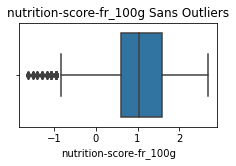

poour le groupe Fat and sauces et la feature fat_100g
il y a 0 outliers


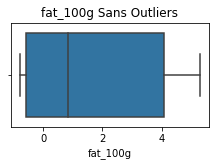

poour le groupe Fat and sauces et la feature sugars_100g
il y a 210 outliers


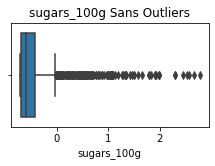

poour le groupe Fat and sauces et la feature energy_100g
il y a 0 outliers


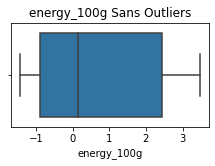

poour le groupe Fat and sauces et la feature carbohydrates_100g
il y a 197 outliers


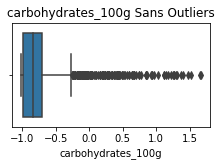

poour le groupe Fat and sauces et la feature saturated-fat_100g
il y a 278 outliers


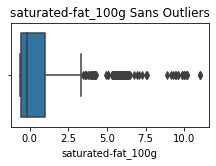

poour le groupe Fat and sauces et la feature fiber_100g
il y a 43 outliers


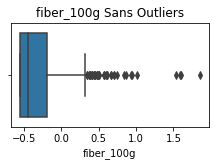

poour le groupe Fat and sauces et la feature proteins_100g
il y a 296 outliers


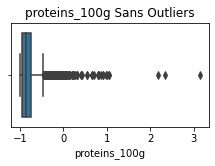

poour le groupe Fat and sauces et la feature salt_100g
il y a 173 outliers


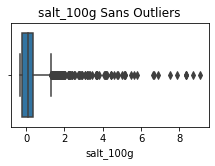

poour le groupe Fat and sauces et la feature nutrition-score-fr_100g
il y a 12 outliers


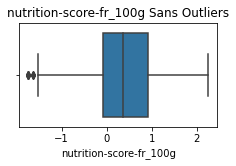

poour le groupe Composite foods et la feature fat_100g
il y a 115 outliers


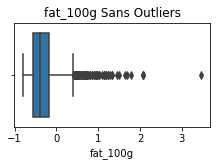

poour le groupe Composite foods et la feature sugars_100g
il y a 161 outliers


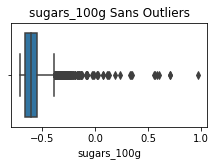

poour le groupe Composite foods et la feature energy_100g
il y a 58 outliers


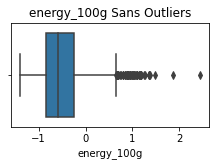

poour le groupe Composite foods et la feature carbohydrates_100g
il y a 121 outliers


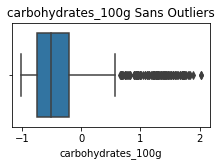

poour le groupe Composite foods et la feature saturated-fat_100g
il y a 220 outliers


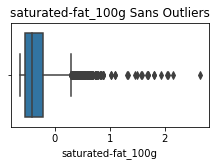

poour le groupe Composite foods et la feature fiber_100g
il y a 176 outliers


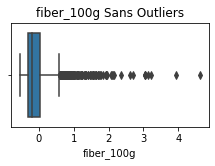

poour le groupe Composite foods et la feature proteins_100g
il y a 124 outliers


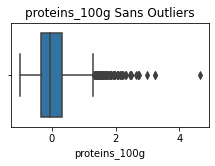

poour le groupe Composite foods et la feature salt_100g
il y a 157 outliers


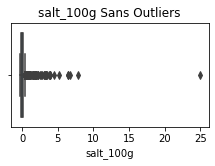

poour le groupe Composite foods et la feature nutrition-score-fr_100g
il y a 182 outliers


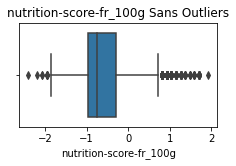

poour le groupe Fish Meat Eggs et la feature fat_100g
il y a 56 outliers


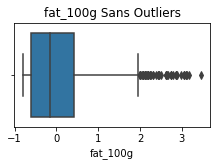

poour le groupe Fish Meat Eggs et la feature sugars_100g
il y a 374 outliers


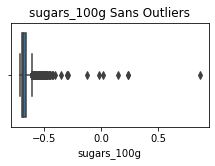

poour le groupe Fish Meat Eggs et la feature energy_100g
il y a 129 outliers


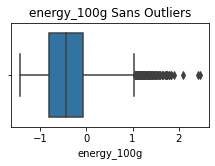

poour le groupe Fish Meat Eggs et la feature carbohydrates_100g
il y a 398 outliers


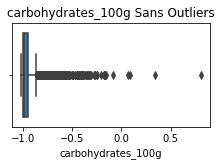

poour le groupe Fish Meat Eggs et la feature saturated-fat_100g
il y a 143 outliers


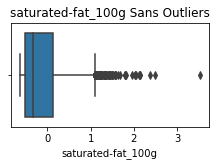

poour le groupe Fish Meat Eggs et la feature fiber_100g
il y a 169 outliers


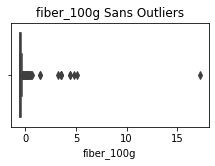

poour le groupe Fish Meat Eggs et la feature proteins_100g
il y a 67 outliers


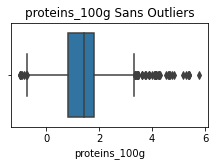

poour le groupe Fish Meat Eggs et la feature salt_100g
il y a 300 outliers


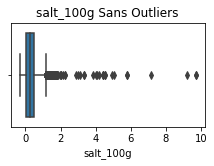

poour le groupe Fish Meat Eggs et la feature nutrition-score-fr_100g
il y a 0 outliers


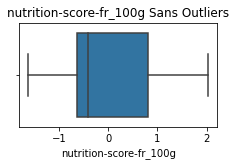

poour le groupe Salty snacks et la feature fat_100g
il y a 85 outliers


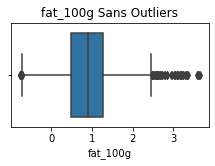

poour le groupe Salty snacks et la feature sugars_100g
il y a 104 outliers


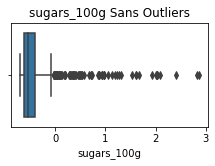

poour le groupe Salty snacks et la feature energy_100g
il y a 174 outliers


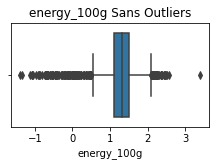

poour le groupe Salty snacks et la feature carbohydrates_100g
il y a 173 outliers


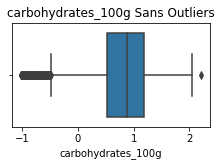

poour le groupe Salty snacks et la feature saturated-fat_100g
il y a 143 outliers


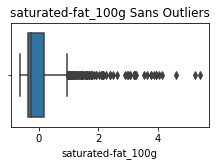

poour le groupe Salty snacks et la feature fiber_100g
il y a 88 outliers


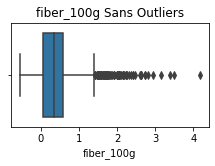

poour le groupe Salty snacks et la feature proteins_100g
il y a 92 outliers


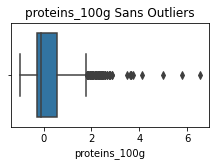

poour le groupe Salty snacks et la feature salt_100g
il y a 50 outliers


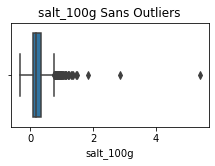

poour le groupe Salty snacks et la feature nutrition-score-fr_100g
il y a 44 outliers


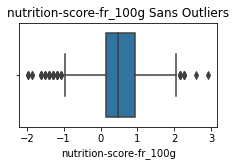

poour le groupe Cereals and potatoes et la feature fat_100g
il y a 341 outliers


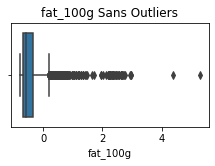

poour le groupe Cereals and potatoes et la feature sugars_100g
il y a 753 outliers


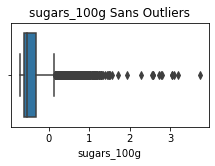

poour le groupe Cereals and potatoes et la feature energy_100g
il y a 348 outliers


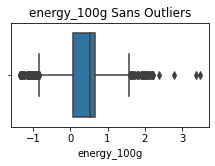

poour le groupe Cereals and potatoes et la feature carbohydrates_100g
il y a 93 outliers


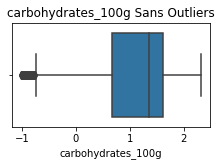

poour le groupe Cereals and potatoes et la feature saturated-fat_100g
il y a 407 outliers


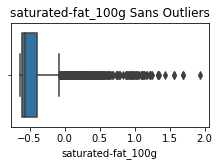

poour le groupe Cereals and potatoes et la feature fiber_100g
il y a 169 outliers


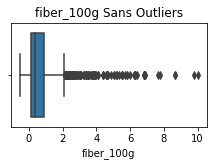

poour le groupe Cereals and potatoes et la feature proteins_100g
il y a 147 outliers


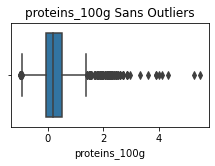

poour le groupe Cereals and potatoes et la feature salt_100g
il y a 57 outliers


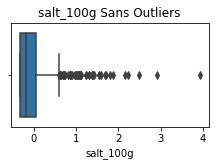

poour le groupe Cereals and potatoes et la feature nutrition-score-fr_100g
il y a 8 outliers


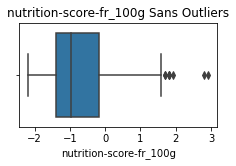

poour le groupe Fruits and vegetables et la feature fat_100g
il y a 351 outliers


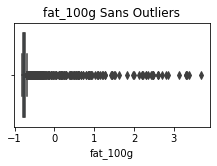

poour le groupe Fruits and vegetables et la feature sugars_100g
il y a 206 outliers


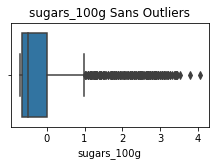

poour le groupe Fruits and vegetables et la feature energy_100g
il y a 391 outliers


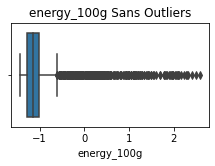

poour le groupe Fruits and vegetables et la feature carbohydrates_100g
il y a 262 outliers


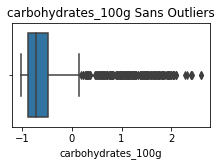

poour le groupe Fruits and vegetables et la feature saturated-fat_100g
il y a 276 outliers


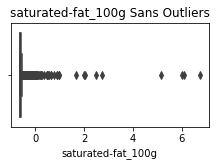

poour le groupe Fruits and vegetables et la feature fiber_100g
il y a 240 outliers


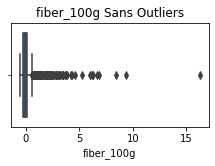

poour le groupe Fruits and vegetables et la feature proteins_100g
il y a 227 outliers


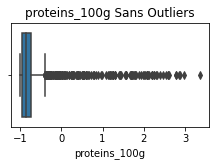

poour le groupe Fruits and vegetables et la feature salt_100g
il y a 97 outliers


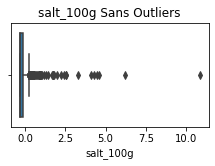

poour le groupe Fruits and vegetables et la feature nutrition-score-fr_100g
il y a 31 outliers


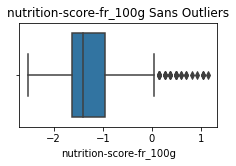

In [109]:
for pnns in pnns_group_1:
    for col in numerical_value_100g:
        q1 = df_scaled[df_scaled['pnns_groups_1'] == pnns][col].quantile(.25)
        q3 = df_scaled[df_scaled['pnns_groups_1'] == pnns][col].quantile(.75)
        IQR = q3 - q1
        upper_boundary = q3 + (1.5 * IQR)
        lower_boundary = q1 - (1.5 * IQR)
        select = df_scaled[df_scaled['pnns_groups_1'] == pnns]
        outliers = select.loc[(select[col] > upper_boundary) | (
            select[col] < lower_boundary), [col]]
        print(
            f"poour le groupe {pnns} et la feature {col}")
        print(
            f"il y a {len(outliers)} outliers" )
        
        without_outliers = select.loc[(select[col] < upper_boundary) | (
            select[col] > lower_boundary), [col]]
        df_outlier = pd.DataFrame(without_outliers, columns=df_scaled.columns)

        plt.subplot(2, 2, 2)
        sns.boxplot(df_outlier[col])
        plt.title(col +  " Sans Outliers")
        plt.tight_layout()
        plt.show()

Nous pouvons observer les données nutritionelles en fonction du Pnns Group, ,ous pouvons en conclure le as dans lequel il ya davantage de valeurs atypiques (non abbérantes). 

# Imputation 
## Feature 'fiber_100g '
Nous cette feature, nous allons considerer que l'absence de données signifie l'absence de fiber_100, nous remplacons donc par 0 avec un fillna(0) 

In [110]:
df_nutriscore['fiber_100g'] = df_nutriscore['fiber_100g'].fillna(0)

<AxesSubplot:>

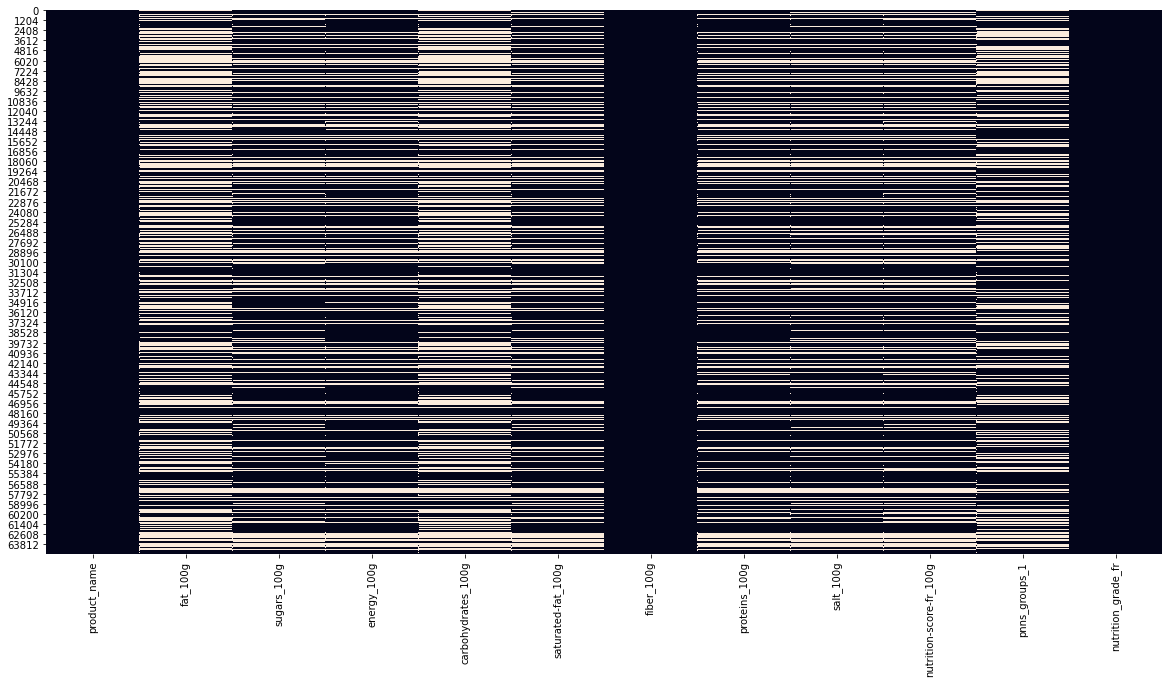

In [111]:
#sisualisation des Nan avec seaborn et le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_nutriscore.isna(), cbar=False)

## KNNImputer 
### Données nutritionelles

In [112]:
# import the KNNimputer class
from sklearn.impute import KNNImputer
import time

In [113]:
df_knn_all_row = df_nutriscore.copy()

In [114]:
composants = df_knn_all_row[numerical_value_100g]
percent_missing = composants.isnull().sum() * 100 / len(composants)
missing_values = pd.DataFrame({'pourcentage_manquant': percent_missing})
missing_values.sort_values('pourcentage_manquant', inplace=True)
missing_values

,pourcentage_manquant
fiber_100g,0.000000
energy_100g,27.713921
proteins_100g,27.857022
salt_100g,29.581929
sugars_100g,29.625013
saturated-fat_100g,29.755805
nutrition-score-fr_100g,30.599024
fat_100g,48.486667
carbohydrates_100g,49.000600


In [115]:
from sklearn.impute import KNNImputer
import time
tps1 = time.time()
X = df_knn_all_row[numerical_value_100g]
#imputer = KNNImputer(n_neighbors=3) # N neighbors aléatoire
#imputed = imputer.fit_transform(X)
tps2 = time.time()
print(tps2 - tps1, "secondes")

0.003987789154052734 secondes


In [116]:
#df_imputed = pd.DataFrame(imputed, columns=X.columns)
#df_imputed

In [117]:
#check KNN imputation worked
#df_imputed.isna().sum()

In [118]:
#df_product_name = df_knn_all_row['product_name']

In [119]:
#df_knn_all_row = pd.concat([df_product_name, df_imputed], axis=1)

In [120]:
#df_knn_all_row.describe()

### Taux de Nan par row <50% 
 taux de Nan par row <50%  de missing values 

In [121]:
df_knn_not_all_row = df_nutriscore.copy()

In [122]:
# Count NaN in each row of a DataFrame
df_knn_not_all_row['% Nan'] = (df_knn_not_all_row.shape[1] -
                               df_knn_not_all_row.count(axis=1))*100/df_knn_not_all_row.shape[1]

In [123]:
df_knn_not_all_row

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr,% Nan
0,,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,E,75.000000
1,Bridelight 3% Les carrés fondants goût Emmental,3.0,8.5,477.0,8.5,2.0,0.0,13.0,2.000000,6.0,Milk and dairy products,C,0.000000
2,bière blonde pur malt,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,E,75.000000
3,100 % Pur Jus Pomme,0.0,9.7,179.0,10.0,0.0,0.0,0.5,0.030000,3.0,Beverages,C,0.000000
4,18 marrons glacés,0.8,56.0,1378.0,76.0,0.1,4.8,0.8,0.050038,9.0,Sugary snacks,C,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64984,黑師傅-草莓,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,E,75.000000
64985,고등어캔,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Fish Meat Eggs,E,66.666667
64986,쌀떡,0.5,2.0,983.0,NaN,0.0,54.0,3.0,0.177800,-4.0,Sugary snacks,A,8.333333
64987,쌀막걸리,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,E,75.000000


In [124]:
df_knn_not_all_row = df_knn_not_all_row.loc[df_knn_not_all_row['% Nan'] < 50]

In [125]:
X = df_knn_not_all_row[numerical_value_100g]

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
df.head()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0.030,0.085,0.126391,0.085,0.020,0.000,0.130,0.0200,0.370370
1,0.000,0.097,0.047430,0.100,0.000,0.000,0.005,0.0003,0.314815
2,0.008,0.560,0.365130,0.760,0.001,0.048,0.008,0.0005,0.425926
3,0.143,0.343,0.433492,0.591,0.062,0.026,0.055,0.0053,0.555556
4,0.220,NaN,0.476948,0.520,NaN,0.000,0.060,NaN,NaN


In [127]:
tps1 = time.time()
imputer = KNNImputer(n_neighbors=3) # N neighbors aléatoire
imputed = imputer.fit_transform(df)
tps2 = time.time()
print(tps2 - tps1, "secondes")

106.11131238937378 secondes


In [128]:
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0.030,0.085000,0.126391,0.0850,0.020000,0.000,0.130,0.020000,0.370370
1,0.000,0.097000,0.047430,0.1000,0.000000,0.000,0.005,0.000300,0.314815
2,0.008,0.560000,0.365130,0.7600,0.001000,0.048,0.008,0.000500,0.425926
3,0.143,0.343000,0.433492,0.5910,0.062000,0.026,0.055,0.005300,0.555556
4,0.220,0.206667,0.476948,0.5200,0.148000,0.000,0.060,0.011300,0.685185
...,...,...,...,...,...,...,...,...,...
46996,0.416,0.115667,0.636354,0.3660,0.067333,0.000,0.145,0.008100,0.629630
46997,0.076,0.008000,0.164547,0.1330,0.023000,0.000,0.067,0.008800,0.296296
46998,0.004,0.002000,0.398516,0.8040,0.001000,0.010,0.067,0.000130,0.240741
46999,0.005,0.020000,0.260466,0.2075,0.000000,0.540,0.030,0.001778,0.185185


In [129]:
# vérification de l'imputation Knn
df_imputed.isna().sum()

fat_100g                   0
sugars_100g                0
energy_100g                0
carbohydrates_100g         0
saturated-fat_100g         0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
nutrition-score-fr_100g    0
dtype: int64

In [130]:
df_knn_not_all_row.reset_index(inplace=True)

In [131]:
df_product_name = df_knn_not_all_row[['product_name','pnns_groups_1','nutrition_grade_fr']]

In [132]:
df = pd.concat([df_product_name, df_imputed], axis=1)

In [133]:
df.describe()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000
mean,0.124936,0.134503,0.293648,0.281679,0.054874,0.018155,0.078368,0.010014,0.421106
std,0.154186,0.187925,0.203272,0.267638,0.085273,0.039737,0.077986,0.029097,0.166097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013000,0.010000,0.114202,0.048000,0.003000,0.000000,0.019000,0.000800,0.277778
50%,0.065000,0.042500,0.272655,0.160000,0.020000,0.001000,0.061000,0.005500,0.425926
75%,0.200000,0.180000,0.437467,0.530967,0.075000,0.023000,0.110000,0.012000,0.537037
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### KNNImputer sur les données qualitatives

In [134]:
df_cat_num = df.copy()

In [135]:
df_cat = df[['product_name']]

In [136]:
df_cat_num = pd.merge(df_cat_num,df_cat, on='product_name')

In [137]:
df_cat_num 

,product_name,pnns_groups_1,nutrition_grade_fr,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Bridelight 3% Les carrés fondants goût Emmental,Milk and dairy products,C,0.030,0.085000,0.126391,0.0850,0.020000,0.000,0.130,0.020000,0.370370
1,100 % Pur Jus Pomme,Beverages,C,0.000,0.097000,0.047430,0.1000,0.000000,0.000,0.005,0.000300,0.314815
2,18 marrons glacés,Sugary snacks,C,0.008,0.560000,0.365130,0.7600,0.001000,0.048,0.008,0.000500,0.425926
3,"6 carrés fourrés, saveur amande",Sugary snacks,D,0.143,0.343000,0.433492,0.5910,0.062000,0.026,0.055,0.005300,0.555556
4,Barre marbrée cacao,Sugary snacks,E,0.220,0.206667,0.476948,0.5200,0.148000,0.000,0.060,0.011300,0.685185
...,...,...,...,...,...,...,...,...,...,...,...,...
46996,Козинак соняшниковий,Sugary snacks,E,0.416,0.115667,0.636354,0.3660,0.067333,0.000,0.145,0.008100,0.629630
46997,Плов со свининой,Composite foods,B,0.076,0.008000,0.164547,0.1330,0.023000,0.000,0.067,0.008800,0.296296
46998,寿司米,Cereals and potatoes,A,0.004,0.002000,0.398516,0.8040,0.001000,0.010,0.067,0.000130,0.240741
46999,쌀떡,Sugary snacks,A,0.005,0.020000,0.260466,0.2075,0.000000,0.540,0.030,0.001778,0.185185


In [138]:
df_dummy_pnns = df_cat_num.copy()

<AxesSubplot:>

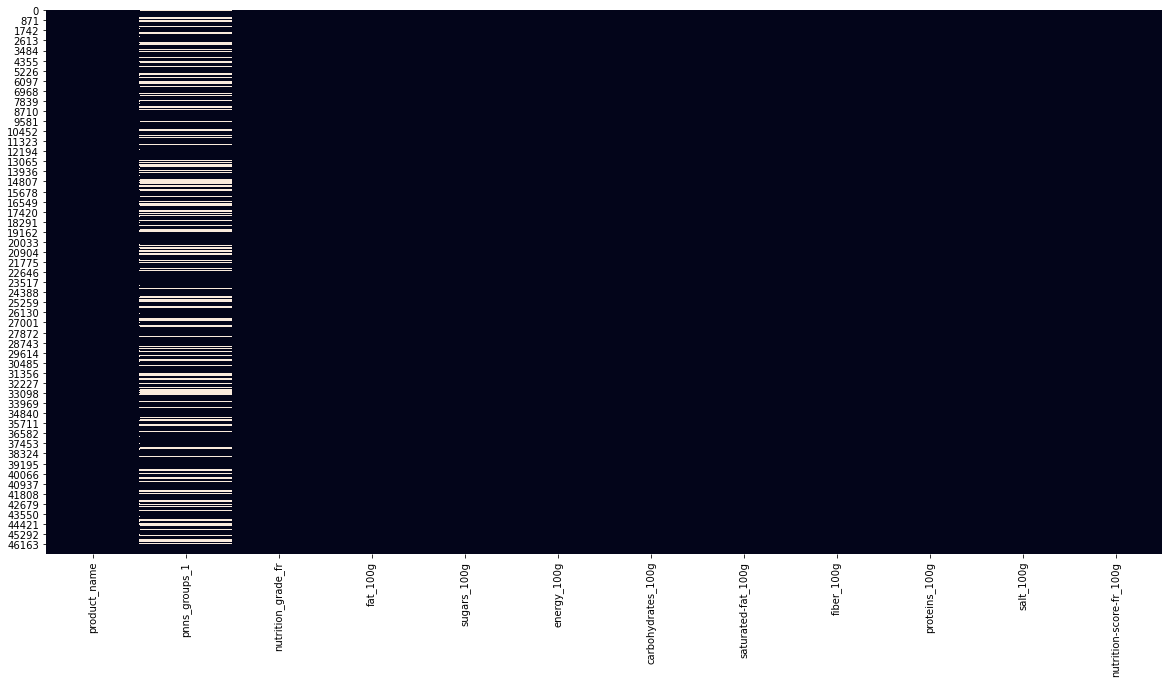

In [139]:
#visualisation des Nan avec seaborn et le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_dummy_pnns.isna(), cbar=False)

In [140]:
df_dummy_pnns['nutrition_grade_fr'].nunique()

5

In [141]:
cat_variables = df_dummy_pnns['pnns_groups_1']
cat_dummies = pd.get_dummies(cat_variables)
cat_dummies.head()

,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks
0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [142]:
df_dummy_pnns.drop(['product_name','pnns_groups_1', 'nutrition_grade_fr'],axis=1,inplace=True)

In [143]:
df = pd.concat([df_dummy_pnns, cat_dummies], axis=1)
df.head()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks
0,0.030,0.085000,0.126391,0.085,0.020,0.000,0.130,0.0200,0.370370,0,0,0,0,0,0,1,0,0
1,0.000,0.097000,0.047430,0.100,0.000,0.000,0.005,0.0003,0.314815,1,0,0,0,0,0,0,0,0
2,0.008,0.560000,0.365130,0.760,0.001,0.048,0.008,0.0005,0.425926,0,0,0,0,0,0,0,0,1
3,0.143,0.343000,0.433492,0.591,0.062,0.026,0.055,0.0053,0.555556,0,0,0,0,0,0,0,0,1
4,0.220,0.206667,0.476948,0.520,0.148,0.000,0.060,0.0113,0.685185,0,0,0,0,0,0,0,0,1


In [144]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks
0,0.030,0.085000,0.126391,0.085,0.020,0.000,0.130,0.0200,0.370370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000,0.097000,0.047430,0.100,0.000,0.000,0.005,0.0003,0.314815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008,0.560000,0.365130,0.760,0.001,0.048,0.008,0.0005,0.425926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.143,0.343000,0.433492,0.591,0.062,0.026,0.055,0.0053,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.220,0.206667,0.476948,0.520,0.148,0.000,0.060,0.0113,0.685185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [145]:
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [146]:
# vérification de l'imputation
df.isna().sum()

fat_100g                   0
sugars_100g                0
energy_100g                0
carbohydrates_100g         0
saturated-fat_100g         0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
nutrition-score-fr_100g    0
Beverages                  0
Cereals and potatoes       0
Composite foods            0
Fat and sauces             0
Fish Meat Eggs             0
Fruits and vegetables      0
Milk and dairy products    0
Salty snacks               0
Sugary snacks              0
dtype: int64

In [147]:
#drop feature axis 1 n'appartenant pas à pnns group avant idmax
df.drop(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','nutrition-score-fr_100g'],axis=1,inplace=True)

In [148]:
# .from_dummies() returns a data frame
new_df = df.idxmax(axis=1)

#pd.dataframe
new_df = pd.DataFrame(new_df)

In [149]:
#concat
df = pd.concat([df_dummy_pnns , new_df], axis=1)

In [150]:
df_cat_num = df_cat_num[['product_name','nutrition_grade_fr']]

In [151]:
#concat
df = pd.concat([df,df_cat_num], axis=1)

In [152]:
# rename
df = df.rename(columns={0: 'pnns_groups_1'})

In [153]:
df.head(3)

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,product_name,nutrition_grade_fr
0,0.030,0.085,0.126391,0.085,0.020,0.000,0.130,0.0200,0.370370,Milk and dairy products,Bridelight 3% Les carrés fondants goût Emmental,C
1,0.000,0.097,0.047430,0.100,0.000,0.000,0.005,0.0003,0.314815,Beverages,100 % Pur Jus Pomme,C
2,0.008,0.560,0.365130,0.760,0.001,0.048,0.008,0.0005,0.425926,Sugary snacks,18 marrons glacés,C


In [154]:
df.isna().sum()

fat_100g                   0
sugars_100g                0
energy_100g                0
carbohydrates_100g         0
saturated-fat_100g         0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
nutrition-score-fr_100g    0
pnns_groups_1              0
product_name               0
nutrition_grade_fr         0
dtype: int64

Nous terminons ici l'étape de traitement des données. Notre jeu de données ne comporte aucune valeur manquante/ abérantes, les imputations avec le KNNImputer nous à permis d'arriver à ce résultat.Nos données sont normalisées ( comprises entre 0 et 1). Passons à l'exploration de nos données

In [155]:
df.to_csv('openfoodfacts.csv', index=False, header=True)